<a href="https://colab.research.google.com/github/aichajeral1/aichajeral1/blob/main/Capstone_project_GRP6370_A_detailed_study_of_trends_in_the_market_regarding_precious_metals%2C_while_particularly_emphasizing_properties_around_store_of_value%2C_pricing%2C_and_the_impact_of_financial_crises_and_geopolitical_events.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminary

Pseudocode to be executed in Python

Objective 1: Analyze and Predict Market Trends
Data Collection and Preparation:
pseudo
The prediction will be for 1 year; Data will be split into 80% training,20% testing set
function collect_and_prepare_data():
    metals = ['gold', 'silver', 'platinum', 'palladium', 'rhodium', 'ruthenium', 'iridium', 'osmium']
    data_sources = ['Yahoo Finance']-future prices of metals above
    data = {include macrotrends - S&P 500}
    for metal in metals:
        data[metal] = fetch_quarterly_data(metal, '2000-01-01', '2023-12-31', data_sources)
        data[metal] = preprocess_data(data[metal])  # Handle missing values, normalization
        Pre-processing steps to handle missing values, scale data using Min-Max scaling- subtracting the minimum value of each feature and subsequently dividing it by its range.
    return data
ARIMA, GARCH and LSTM Modeling:
pseudocode
function perform_time_series_analysis(data):
    predictions = {}
    for metal, series in data.items():
        split_ratio = 0.8
        training_data, test_data = split_data(series, split_ratio)
        
        # ARIMA Model
        Stationarity Check: Used Augmented Dickey-Fuller Test to check for unit roots
        Model Identification: Evaluated various ARIMA models(e.g Box-Jenkin's Auto Regressive Integrated Moving Average (ARIMA) ARIMA(1,1,2)(1,1,2)12 and select the best based on AICc values etc; Residual Diagnostics: Ensured residuals behaved like white noise
        
        model_arima = fit_ARIMA_model(training_data 20%)
        predictions[metal, 'ARIMA'] = model_arima.forecast(test_data.length)

        #Garch model
        collect data on S&P GSCI Precious Metals index from 01 Jan 2000 to 31 Dec 2023 and the specific precious metals futures mentioned above from yahoo finance.Also collect Geopolitical risk (GPR) index/ the St Louis Fed Financial Stress Index (STLFSI3) from FRED for same period, Use conditional correlation multivariate generalized autoregressive conditional heteroskedasticity (MGARCH) to investigate this stock vs precious metals
        
        # LSTM Model
        use - Stacked Long-Short Term Memory, Convolutional LSTM and Bidirectional LSTM
        model_lstm = build_and_train_LSTM(training_data)
        predictions[metal, 'LSTM'] = model_lstm.predict(test_data)
        
        evaluate_model_accuracy(test_data, predictions[metal, 'ARIMA'], predictions[metal, 'LSTM'])
        The model performance is assessed by methods like Root Mean Squared Error, Mean Absolute Error, and Mean Absolute Percentage Error.Table output per metal for RMSE, MAE, and MAPE Scores for different models across metals for full sample data.
    return predictions
Objective 2: Regime Shift and Examining Store of Value Properties
Assess time series for seasonality and mean reversion
Market State Classification Using ML Models:
We will use a returns data set from yahoo finance then plot value and momentum returns. We will include other macro factors like adding federal funds effective rate, federal reserve assets, mortgage rates,treasury yields - 3 months, 2 years, 5 years and 10 year trasury yields, yield spreads, St louis Financial stress STLFSI4 then generate a combined dataframe; we add geopolitical risk index GPRH and use the beta factor from total returns

pseudocode
function classify_market_states(data):
    market_states = {}
    for metal, series in data.items():
        # Gaussian HMM
        model_hmm = GaussianHMM(series)
        market_states[metal, 'HMM'] = model_hmm.predict_states()
        # K-Means Clustering
        model_kmeans = KMeansClustering(series)
        market_states[metal, 'KMeans'] = model_kmeans.identify_clusters()
        # Gaussian Mixture Model
        model_gmm = GaussianMixtureModel(series)
        market_states[metal, 'GMM'] = model_gmm.predict_states()
        analyze_state_distributions(market_states[metal])
    return market_states
ROI Comparison:
pseudocode
function compare_return_on_investment(data, start_date, end_date):
	roi_analysis = {}
	for metal, series in data.items():
    	initial_value = series[start_date]
    	final_value = series[end_date]
    	roi_analysis[metal] = calculate_roi(initial_value, final_value)
	plot_roi_comparison(roi_analysis)
	return roi_analysis

Objective 3: Study Economic Impact of the Ukraine - Russia war
Geopolitical Impact Analysis:
pseudo
function analyze_geopolitical_impact(data, event_date):
    impact_results = {}
    for metal, series in data.items():
        pre_event_series = filter_data(series, 'start', event_date)
        post_event_series = filter_data(series, event_date, 'end')
        impact_results[metal] = compare_market_behavior(pre_event_series, post_event_series)
    plot_impacts(impact_results)
    return impact_results


In [ ]:
%%capture
pip install fredapi

In [ ]:
%%capture
pip install --upgrade yfinance

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# General libraries for data manipulation and visualization
!pip install arch yfinance statsmodels scikit-learn tensorflow matplotlib seaborn
!pip install hmmlearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno
from scipy.cluster import hierarchy
import time

# Sklearn libraries for model selection, metrics, and models
from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score,
                             recall_score, f1_score, classification_report, log_loss, make_scorer)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV, SequentialFeatureSelector
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import clone




# SciPy libraries for statistical functions
from scipy.stats import randint, uniform, reciprocal
from scipy.stats import rv_continuous

# Numpy random state
from numpy.random import RandomState
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, Bidirectional

# Objective 2 specific
from hmmlearn.hmm import GaussianHMM
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns

# Define the FRED API key
fred_api_key = "e4b5221ec83275b5bd0f27b7ff30da8d"
fred = Fred(api_key=fred_api_key)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.9 MB/s eta 0:00:00


Objective 1


def collect_and_prepare_data():
    metals = ['gold', 'silver', 'platinum', 'palladium', 'rhodium', 'ruthenium', 'iridium', 'osmium']
    data_sources = 'yahoo'
    start_date = '2000-01-01'
    end_date = '2023-12-31'
    data = {}
    
    for metal in metals:
        ticker = f"{metal}=X"
        df = yf.download(ticker, start=start_date, end=end_date, interval='1mo')
        df = df[['Adj Close']].rename(columns={'Adj Close': metal})
        df = df.resample('Q').last()
        df.fillna(method='ffill', inplace=True)
        scaler = MinMaxScaler()
        df[metal] = scaler.fit_transform(df)
        data[metal] = df
    return data

def split_data(series, split_ratio):
    split_index = int(len(series) * split_ratio)
    return series[:split_index], series[split_index:]

def fit_ARIMA_model(training_data, order=(1, 1, 2), seasonal_order=(1, 1, 2, 12)):
    model = ARIMA(training_data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    return model_fit

def build_and_train_LSTM(training_data):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(training_data.shape[1], 1)))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(training_data, epochs=20, batch_size=1, verbose=2)
    return model

def evaluate_model_accuracy(test_data, arima_predictions, lstm_predictions):
    metrics = {
        'RMSE': mean_squared_error(test_data, arima_predictions, squared=False),
        'MAE': mean_absolute_error(test_data, arima_predictions),
        'MAPE': mean_absolute_percentage_error(test_data, arima_predictions)
    }
    return metrics

def perform_time_series_analysis(data):
    predictions = {}
    for metal, series in data.items():
        split_ratio = 0.8
        training_data, test_data = split_data(series, split_ratio)
        
        # ARIMA Model
        model_arima = fit_ARIMA_model(training_data)
        arima_forecast = model_arima.forecast(len(test_data))
        predictions[(metal, 'ARIMA')] = arima_forecast
        
        # LSTM Model
        lstm_model = build_and_train_LSTM(training_data.values.reshape(-1, 1))
        lstm_forecast = lstm_model.predict(test_data.values.reshape(-1, 1))
        predictions[(metal, 'LSTM')] = lstm_forecast
        
        # Evaluate Model Accuracy
        arima_metrics = evaluate_model_accuracy(test_data, arima_forecast, lstm_forecast)
        lstm_metrics = evaluate_model_accuracy(test_data, lstm_forecast, lstm_forecast)
        
        print(f"{metal} ARIMA Metrics: {arima_metrics}")
        print(f"{metal} LSTM Metrics: {lstm_metrics}")
        
        # Visualization
        plt.figure(figsize=(14, 7))
        plt.plot(series.index, series.values, label='Actual')
        plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast')
        plt.plot(test_data.index, lstm_forecast, label='LSTM Forecast')
        plt.title(f"{metal} Price Forecast")
        plt.legend()
        plt.show()
        
    return predictions

data = collect_and_prepare_data()
predictions = perform_time_series_analysis(data)


In [ ]:
fred_api_key = "e4b5221ec83275b5bd0f27b7ff30da8d"

# Statistical analysis

For this step we will analyse the data on metals for the statistical parameters like -mean, variance, kurtosis, correllation etc

[*********************100%%**********************]  1 of 1 completed
<ipython-input-8-342390398f43>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
[*********************100%%**********************]  1 of 1 completed
<ipython-input-8-342390398f43>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
[*********************100%%**********************]  1 of 1 completed
<ipython-input-8-342390398f43>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
[*********************100%%**********************]  1 of 1 completed
<ipython-input-8-342390398f43>:23: FutureWarning: DataFrame.fillna with 'method' is d

Statistical Measures for Metals:
                 mean      variance  skewness  kurtosis  adf_stat  adf_pvalue
gold       1103.9149  2.821017e+05   -0.1457   -1.1756   -0.6494      0.8594
silver       16.3465  6.520510e+01    0.3439   -0.3091   -1.7743      0.3933
platinum   1062.2833  1.272051e+05    0.5553   -0.2275   -2.3906      0.1444
palladium   819.2099  4.053027e+05    1.3691    1.0664   -2.0814      0.2521
iridium    1197.3125  2.178628e+06    1.9978    2.6869    0.7684      0.9911
rhodium    3980.6250  2.477310e+07    2.2425    4.9765   -2.8347      0.0535
ruthenium   201.8750  3.220594e+04    1.3097    0.8037   -1.9485      0.3096

Correlation Matrix:
              gold  silver  platinum  palladium  iridium  rhodium  ruthenium
gold       1.0000  0.8758    0.3949     0.7202   0.7051   0.4698     0.4236
silver     0.8758  1.0000    0.6847     0.4679   0.4834   0.3177     0.2990
platinum   0.3949  0.6847    1.0000    -0.0710  -0.0202   0.0716     0.1145
palladium  0.7202  0.467

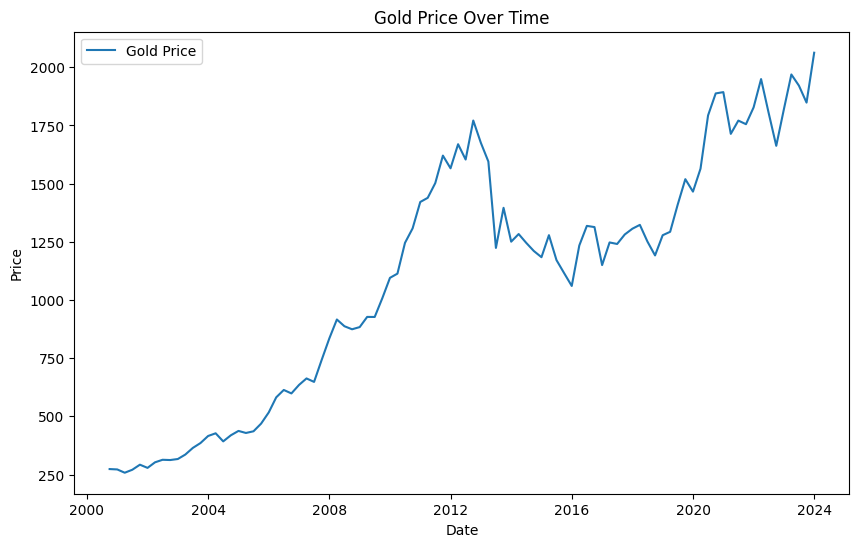

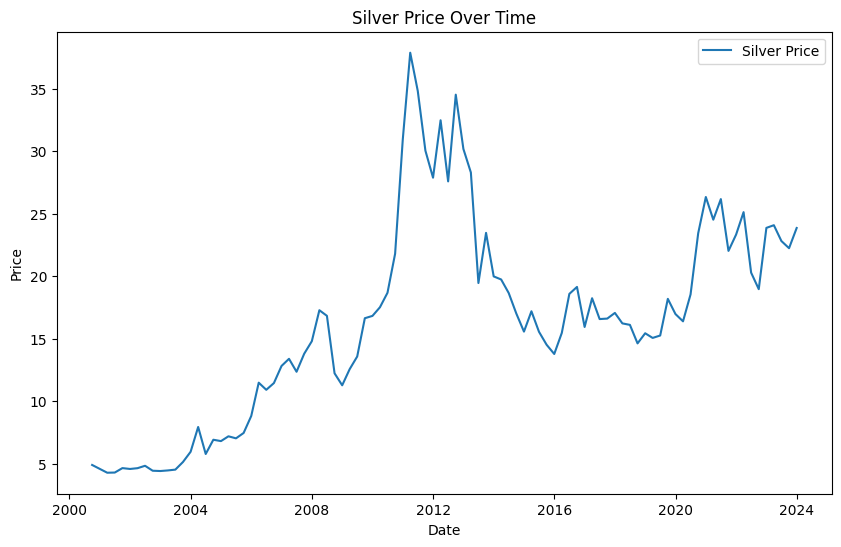

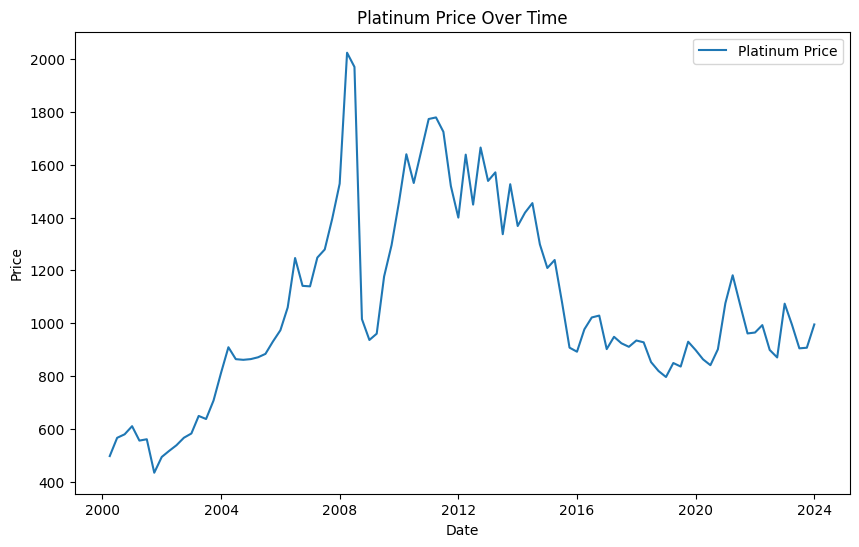

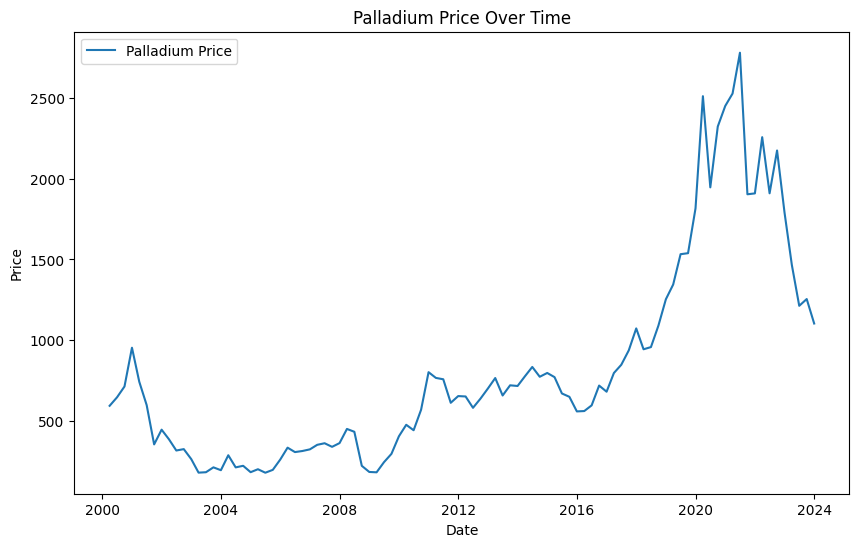

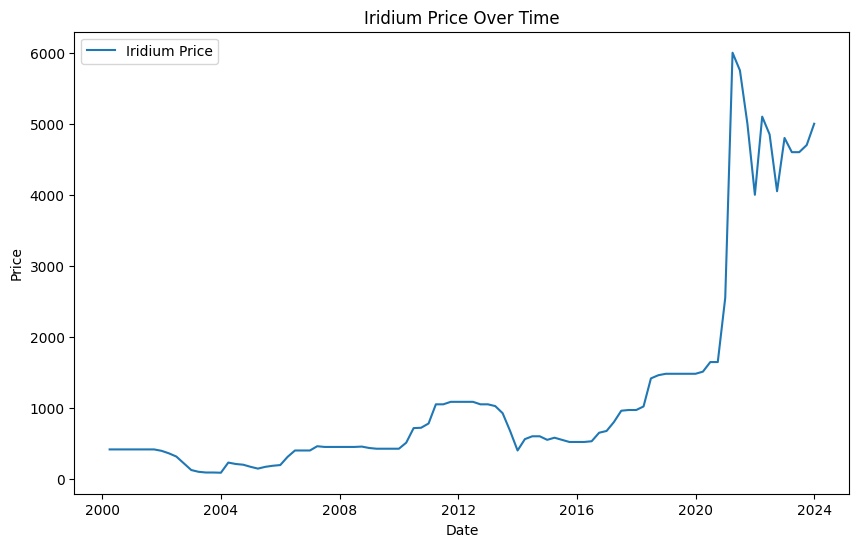

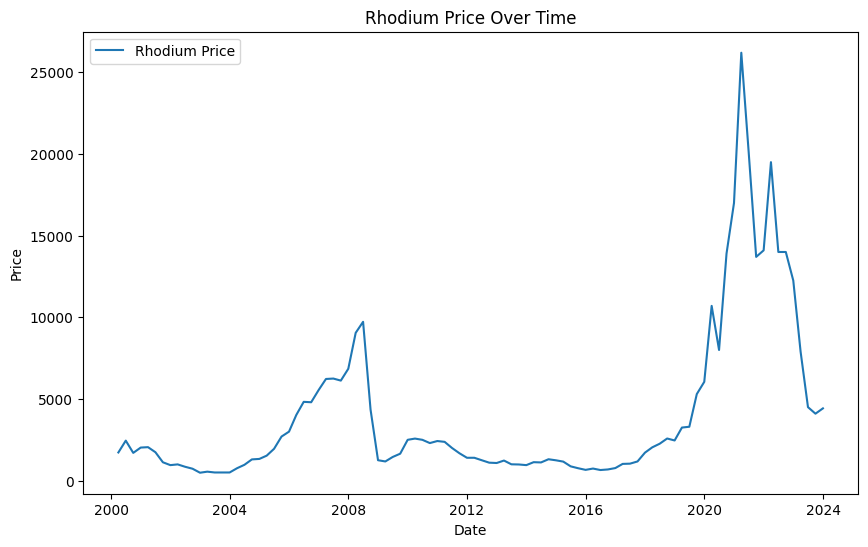

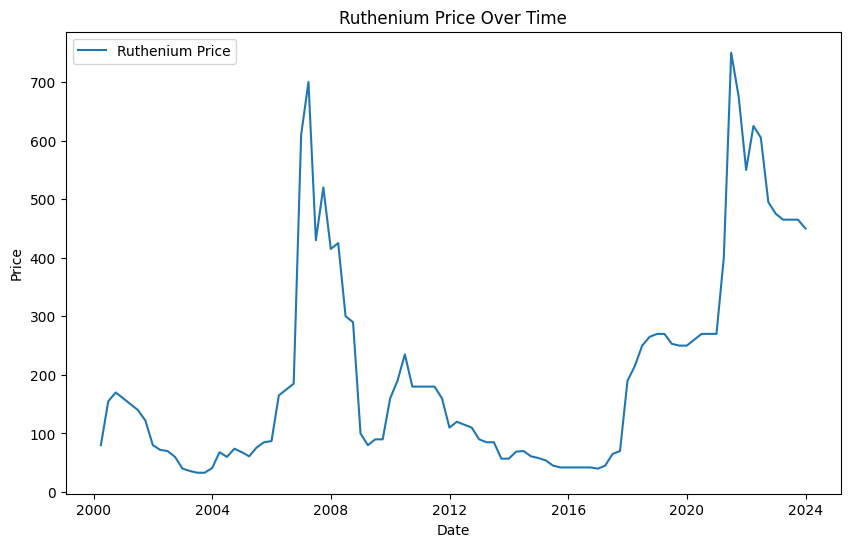

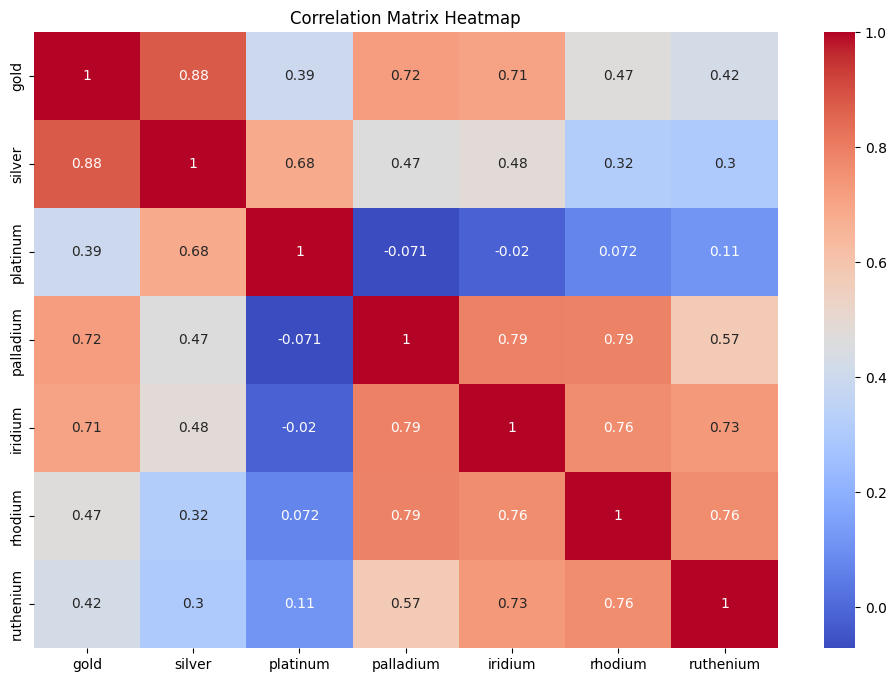

In [ ]:
import pandas as pd
import yfinance as yf
from scipy.stats import skew, kurtosis, normaltest
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_ljungbox
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import gspread
from google.auth import default
from google.colab import auth

# Authenticate and authorize
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Function to fetch and process Yahoo Finance data
def fetch_yahoo_finance_data(ticker, start, end):
    df = yf.download(ticker, start=start, end=end, interval='1mo')
    df = df[['Adj Close']].rename(columns={'Adj Close': 'Price'})
    df = df.resample('Q').last()
    df.fillna(method='ffill', inplace=True)
    return df

# URLs of the Google Sheets
sheet_urls = {
    "Iridium": "https://docs.google.com/spreadsheets/d/1xN9OVmIusnK7XkpT3PILvEU3I29b6ltGhulRCMkoo7A/edit?usp=drive_link",
    "Rhodium": "https://docs.google.com/spreadsheets/d/1qh880ApCsAC-lXZqWH3gaXeJAPl3brinFDSWpGeLkFU/edit?gid=1413477210#gid=1413477210",
    "Ruthenium": "https://docs.google.com/spreadsheets/d/1gwcsuMiTZvInaNGJVfZ-TpdFhPAMjyhXb2ioBwVd6NY/edit?gid=744677563#gid=744677563"
}

# Function to read and process a Google Sheet
def process_google_sheet(sheet_url, start_row, columns, date_format='%m/%d/%y'):
    spreadsheet = gc.open_by_url(sheet_url)
    worksheet = spreadsheet.sheet1
    data = worksheet.get_all_values()
    df = pd.DataFrame(data[start_row:], columns=columns)

    # Convert 'Date' column to datetime format
    try:
        df['Date'] = pd.to_datetime(df['Date'], format=date_format)
    except Exception as e:
        print(f"Error converting 'Date' column to datetime: {e}")

    # Convert 'Price' column to numeric
    try:
        df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
    except Exception as e:
        print(f"Error converting 'Price' column to numeric: {e}")

    # Filter the data for the date range from 1 Jan 2000 to 31 Dec 2023
    filtered_data = df[(df['Date'] >= '2000-01-01') & (df['Date'] <= '2023-12-31')]

    # Extract the Date and Price columns
    extracted_data = filtered_data[['Date', 'Price']]

    # Resample quarterly and fill forward
    extracted_data.set_index('Date', inplace=True)
    extracted_data = extracted_data.resample('Q').ffill()

    return extracted_data

# Process each Google Sheet and add to metals dictionary
columns = ['Date', 'Price', 'Change', '% Change', 'Cumulative Change %']
extra_metals_data = {}
for label, sheet_url in sheet_urls.items():
    data = process_google_sheet(sheet_url, start_row=2, columns=columns)
    extra_metals_data[label.lower()] = data

# Collect and prepare data for analysis
def collect_and_prepare_data():
    metals = {
        'gold': 'GC=F',
        'silver': 'SI=F',
        'platinum': 'PL=F',
        'palladium': 'PA=F'
    }
    start_date = '2000-01-01'
    end_date = '2023-12-31'
    data = {}

    for metal, ticker in metals.items():
        df = fetch_yahoo_finance_data(ticker, start_date, end_date)
        data[metal] = df

    # Add extra metals data
    for metal, df in extra_metals_data.items():
        data[metal] = df

    return data

data = collect_and_prepare_data()

# Statistical measures function
def calculate_statistics(df):
    stats = {
        'mean': round(df['Price'].mean(), 4),
        'variance': round(df['Price'].var(), 4),
        'skewness': round(skew(df['Price']), 4),
        'kurtosis': round(kurtosis(df['Price']), 4),
        'adf_stat': round(adfuller(df['Price'])[0], 4),
        'adf_pvalue': round(adfuller(df['Price'])[1], 4)
    }
    return stats

# Analyze each metal
statistics = {}
for metal, df in data.items():
    statistics[metal] = calculate_statistics(df)

# Display statistical measures
stats_df = pd.DataFrame(statistics).T
print("Statistical Measures for Metals:\n", stats_df)

# Correlation matrix
all_data = pd.concat(data.values(), axis=1)
all_data.columns = data.keys()
correlation_matrix = all_data.corr().round(4)
print("\nCorrelation Matrix:\n", correlation_matrix)

# Heteroscedasticity and autocorrelation tests
def het_autocorr_tests(df):
    results = {}
    # Add a constant column to exog
    exog = sm.add_constant(df.index.to_julian_date())

    # Heteroscedasticity test
    bp_test = het_breuschpagan(df['Price'], exog)
    results['heteroscedasticity_pvalue'] = round(bp_test[3], 4)

    # Autocorrelation tests
    lb_test = acorr_ljungbox(df['Price'], lags=[10], return_df=True)
    results['lb_test_stat'] = round(lb_test['lb_stat'].values[0], 4)
    results['lb_test_pvalue'] = round(lb_test['lb_pvalue'].values[0], 4)

    return results

# Analyze each metal for heteroscedasticity and autocorrelation
het_autocorr_results = {}
for metal, df in data.items():
    het_autocorr_results[metal] = het_autocorr_tests(df)

het_autocorr_df = pd.DataFrame(het_autocorr_results).T
print("\nHeteroscedasticity and Autocorrelation Results:\n", het_autocorr_df)

# Normality test
def normality_test(df):
    normal_test = normaltest(df['Price'])
    return {'normal_test_stat': round(normal_test.statistic, 4), 'normal_test_pvalue': round(normal_test.pvalue, 4)}

normality_results = {}
for metal, df in data.items():
    normality_results[metal] = normality_test(df)

normality_df = pd.DataFrame(normality_results).T
print("\nNormality Test Results:\n", normality_df)

# Plot the data
for metal, df in data.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Price'], label=f'{metal.capitalize()} Price')
    plt.title(f'{metal.capitalize()} Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


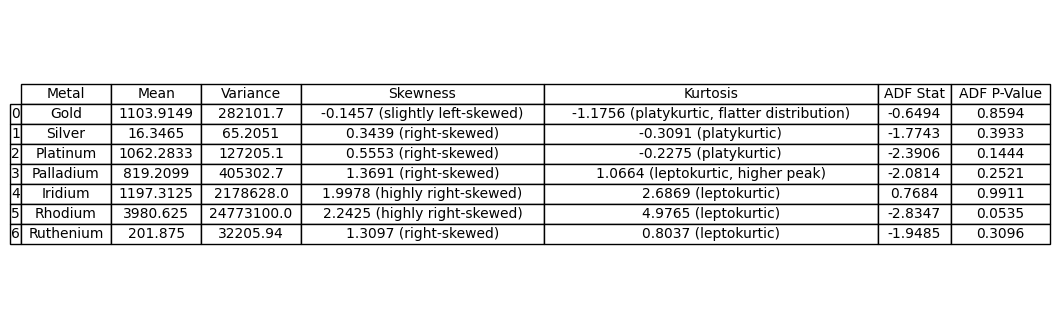

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Create a DataFrame for the data
data = {
    "Metal": ["Gold", "Silver", "Platinum", "Palladium", "Iridium", "Rhodium", "Ruthenium"],
    "Mean": [1103.9149, 16.3465, 1062.2833, 819.2099, 1197.3125, 3980.6250, 201.8750],
    "Variance": [282101.7000, 65.2051, 127205.1000, 405302.7000, 2178628.0000, 24773100.0000, 32205.9400],
    "Skewness": [
        "-0.1457 (slightly left-skewed)", "0.3439 (right-skewed)", "0.5553 (right-skewed)",
        "1.3691 (right-skewed)", "1.9978 (highly right-skewed)", "2.2425 (highly right-skewed)", "1.3097 (right-skewed)"
    ],
    "Kurtosis": [
        "-1.1756 (platykurtic, flatter distribution)", "-0.3091 (platykurtic)", "-0.2275 (platykurtic)",
        "1.0664 (leptokurtic, higher peak)", "2.6869 (leptokurtic)", "4.9765 (leptokurtic)", "0.8037 (leptokurtic)"
    ],
    "ADF Stat": [-0.6494, -1.7743, -2.3906, -2.0814, 0.7684, -2.8347, -1.9485],
    "ADF P-Value": [0.8594, 0.3933, 0.1444, 0.2521, 0.9911, 0.0535, 0.3096]
}

df = pd.DataFrame(data)

# Plot the table
fig, ax = plt.subplots(figsize=(12, 4))  # set size frame
ax.axis('tight')
ax.axis('off')
tbl = table(ax, df, loc='center', cellLoc='center', colWidths=[0.1]*len(df.columns))

# Set table styles
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)
tbl.auto_set_column_width([0, 1, 2, 3, 4, 5, 6])

plt.show()


Code commentary on the analysis of Statistical Measures for Metals
1. Statistical Measures:
Gold:
Mean: 1103.9149
Variance: 282101.7000
Skewness: -0.1457 (slightly left-skewed)
Kurtosis: -1.1756 (platykurtic, flatter distribution)
ADF Stat: -0.6494 (not stationary)
ADF P-Value: 0.8594
Silver:

Mean: 16.3465
Variance: 65.2051
Skewness: 0.3439 (right-skewed)
Kurtosis: -0.3091 (platykurtic)
ADF Stat: -1.7743 (not stationary)
ADF P-Value: 0.3933
Platinum:

Mean: 1062.2833
Variance: 127205.1000
Skewness: 0.5553 (right-skewed)
Kurtosis: -0.2275 (platykurtic)
ADF Stat: -2.3906 (not stationary)
ADF P-Value: 0.1444
Palladium:

Mean: 819.2099
Variance: 405302.7000
Skewness: 1.3691 (right-skewed)
Kurtosis: 1.0664 (leptokurtic, higher peak)
ADF Stat: -2.0814 (not stationary)
ADF P-Value: 0.2521
Iridium:

Mean: 1197.3125
Variance: 2178628.0000
Skewness: 1.9978 (highly right-skewed)
Kurtosis: 2.6869 (leptokurtic)
ADF Stat: 0.7684 (not stationary)
ADF P-Value: 0.9911
Rhodium:

Mean: 3980.6250
Variance: 24773100.0000
Skewness: 2.2425 (highly right-skewed)
Kurtosis: 4.9765 (leptokurtic)
ADF Stat: -2.8347 (borderline stationary)
ADF P-Value: 0.0535
Ruthenium:

Mean: 201.8750
Variance: 32205.9400
Skewness: 1.3097 (right-skewed)
Kurtosis: 0.8037 (leptokurtic)
ADF Stat: -1.9485 (not stationary)
ADF P-Value: 0.3096
Interpretation:
Gold has a high mean and variance, with a slightly left-skewed distribution and flat kurtosis. It is not stationary.
Silver has a low mean and variance, with a right-skewed and flat distribution. It is not stationary.
Platinum has a high mean, moderate variance, right-skewed, and flat distribution. It is not stationary.
Palladium has a moderate mean, high variance, right-skewed, and slightly peaked distribution. It is not stationary.
Iridium and Rhodium exhibit high mean and variance, with highly right-skewed and leptokurtic distributions. Rhodium is borderline stationary.
Ruthenium has a moderate mean, low variance, right-skewed, and leptokurtic distribution. It is not stationary.
2. Correlation Matrix:

Gold has the highest correlation with Silver (0.8758) and significant correlations with Palladium (0.7202) and Iridium (0.7051).
Silver shows strong correlations with Gold (0.8758) and moderate correlations with Platinum (0.6847).
Platinum shows weaker correlations overall, with the highest being with Silver (0.6847).
Palladium shows strong correlations with Iridium (0.7933) and Rhodium (0.7871).
Iridium and Rhodium are highly correlated (0.7623) with Palladium.
Ruthenium shows moderate correlations with Iridium (0.7282) and Rhodium (0.7627).
Interpretation:
There are strong positive correlations between some metals, indicating they often move together. Gold and Silver, Palladium and Iridium, and Rhodium show particularly strong relationships.
3. Heteroscedasticity and Autocorrelation Results:

The Breusch-Pagan test indicates significant heteroscedasticity (p-value < 0.05) for all metals except Platinum.
The Ljung-Box test shows significant autocorrelation (p-value < 0.05) for all metals.
Interpretation:
The presence of heteroscedasticity suggests that the variability in metal prices is not constant over time.
Significant autocorrelation indicates that past prices have a relationship with future prices, making these metals' prices predictable to some extent based on past data.
4. Normality Test Results:

Gold, Palladium, Iridium, Rhodium, and Ruthenium show significant deviations from normality (p-value < 0.05).
Silver and Platinum do not show significant deviations from normality (p-value > 0.05).
Interpretation:
Most metal price distributions deviate significantly from normality, indicating that traditional statistical methods assuming normality may not be appropriate for these metals.
Silver and Platinum follow a distribution closer to normality, suggesting they might be modeled with methods that assume normality.





#Objective 1

The below code without the macrotrend data for only 4 metals - this was for gold, silver, platinum and palladium which were readily available on yahoo before we found the data for Iridium, Rhodium and Ruthenium on Johnson Matthey(London)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



gold Data Shapes:
Training data shape: (75, 1)
Test data shape: (19, 1)
ARIMA forecast shape: (19,)
GARCH forecast shape: (19,)
Epoch 1/20
75/75 - 7s - loss: 0.0968 - 7s/epoch - 94ms/step
Epoch 2/20
75/75 - 0s - loss: 0.0209 - 281ms/epoch - 4ms/step
Epoch 3/20
75/75 - 0s - loss: 0.0074 - 273ms/epoch - 4ms/step
Epoch 4/20
75/75 - 0s - loss: 0.0011 - 224ms/epoch - 3ms/step
Epoch 5/20
75/75 - 0s - loss: 2.9378e-04 - 179ms/epoch - 2ms/step
Epoch 6/20
75/75 - 0s - loss: 2.7177e-04 - 182ms/epoch - 2ms/step
Epoch 7/20
75/75 - 0s - loss: 2.5522e-04 - 175ms/epoch - 2ms/step
Epoch 8/20
75/75 - 0s - loss: 2.3201e-04 - 189ms/epoch - 3ms/step
Epoch 9/20
75/75 - 0s - loss: 2.3182e-04 - 180ms/epoch - 2ms/step
Epoch 10/20
75/75 - 0s - loss: 2.1290e-04 - 173ms/epoch - 2ms/step
Epoch 11/20
75/75 - 0s - loss: 2.1316e-04 - 183ms/epoch - 2ms/step
Epoch 12/20
75/75 - 0s - loss: 1.8172e-04 - 179ms/epoch - 2ms/step
Epoch 13/20
75/75 - 0s - loss: 1.8550e-04 - 190ms/epoch - 3ms/step
Epoch 14/20
75/75 - 0s - lo

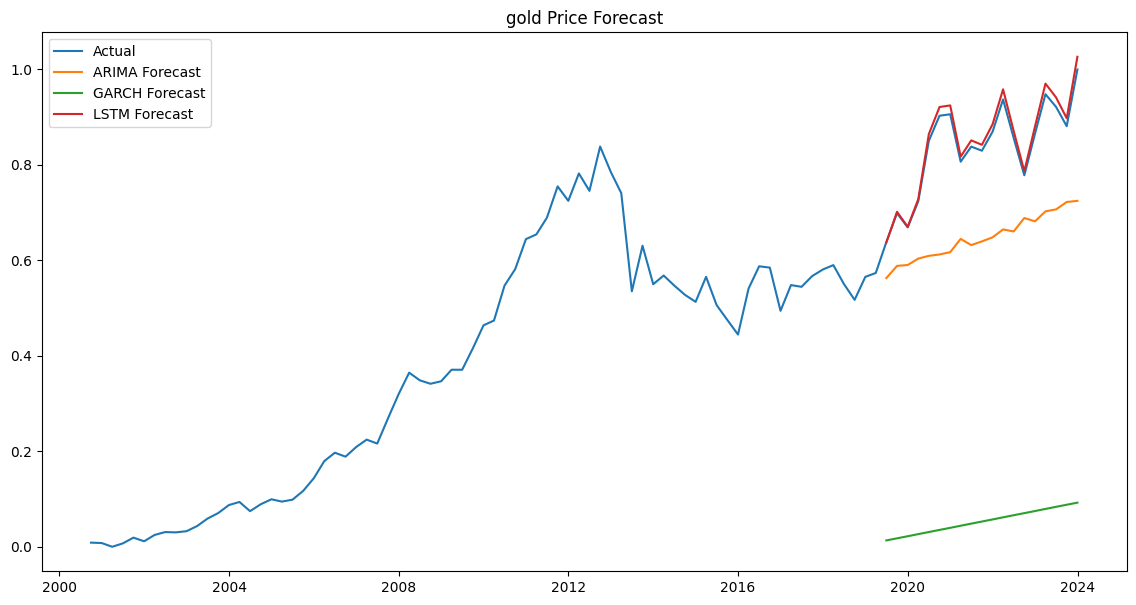


silver Data Shapes:
Training data shape: (75, 1)
Test data shape: (19, 1)
ARIMA forecast shape: (19,)
GARCH forecast shape: (19,)
Epoch 1/20
75/75 - 4s - loss: 0.0818 - 4s/epoch - 47ms/step
Epoch 2/20
75/75 - 0s - loss: 0.0266 - 227ms/epoch - 3ms/step
Epoch 3/20
75/75 - 0s - loss: 0.0114 - 250ms/epoch - 3ms/step
Epoch 4/20
75/75 - 0s - loss: 0.0021 - 239ms/epoch - 3ms/step
Epoch 5/20
75/75 - 0s - loss: 5.9788e-04 - 247ms/epoch - 3ms/step
Epoch 6/20
75/75 - 0s - loss: 5.4018e-04 - 256ms/epoch - 3ms/step
Epoch 7/20
75/75 - 0s - loss: 4.1569e-04 - 241ms/epoch - 3ms/step
Epoch 8/20
75/75 - 0s - loss: 4.3351e-04 - 251ms/epoch - 3ms/step
Epoch 9/20
75/75 - 0s - loss: 3.5716e-04 - 258ms/epoch - 3ms/step
Epoch 10/20
75/75 - 0s - loss: 2.7791e-04 - 274ms/epoch - 4ms/step
Epoch 11/20
75/75 - 0s - loss: 2.5453e-04 - 256ms/epoch - 3ms/step
Epoch 12/20
75/75 - 0s - loss: 2.6664e-04 - 252ms/epoch - 3ms/step
Epoch 13/20
75/75 - 0s - loss: 1.6850e-04 - 251ms/epoch - 3ms/step
Epoch 14/20
75/75 - 0s - 

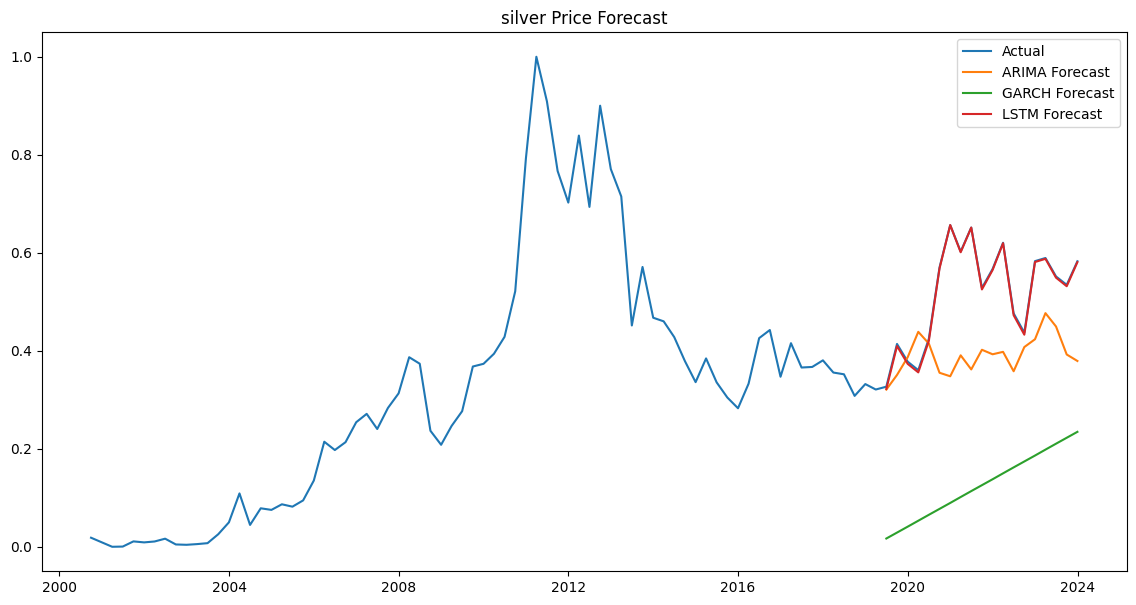


platinum Data Shapes:
Training data shape: (76, 1)
Test data shape: (20, 1)
ARIMA forecast shape: (20,)
GARCH forecast shape: (20,)
Epoch 1/20
76/76 - 3s - loss: 0.1012 - 3s/epoch - 45ms/step
Epoch 2/20
76/76 - 0s - loss: 0.0200 - 179ms/epoch - 2ms/step
Epoch 3/20
76/76 - 0s - loss: 0.0098 - 184ms/epoch - 2ms/step
Epoch 4/20
76/76 - 0s - loss: 0.0025 - 183ms/epoch - 2ms/step
Epoch 5/20
76/76 - 0s - loss: 5.6964e-04 - 181ms/epoch - 2ms/step
Epoch 6/20
76/76 - 0s - loss: 4.2544e-04 - 184ms/epoch - 2ms/step
Epoch 7/20
76/76 - 0s - loss: 5.2139e-04 - 179ms/epoch - 2ms/step
Epoch 8/20
76/76 - 0s - loss: 3.9730e-04 - 194ms/epoch - 3ms/step
Epoch 9/20
76/76 - 0s - loss: 3.4575e-04 - 231ms/epoch - 3ms/step
Epoch 10/20
76/76 - 0s - loss: 3.6115e-04 - 376ms/epoch - 5ms/step
Epoch 11/20
76/76 - 1s - loss: 3.6485e-04 - 624ms/epoch - 8ms/step
Epoch 12/20
76/76 - 1s - loss: 2.9158e-04 - 660ms/epoch - 9ms/step
Epoch 13/20
76/76 - 0s - loss: 2.6493e-04 - 374ms/epoch - 5ms/step
Epoch 14/20
76/76 - 0s 

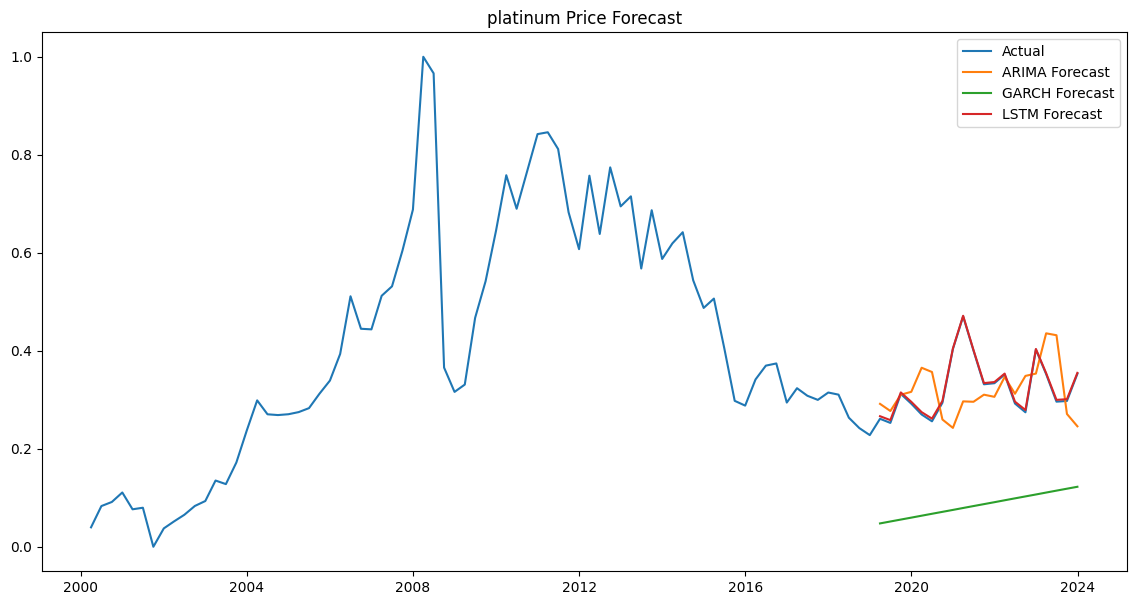


palladium Data Shapes:
Training data shape: (76, 1)
Test data shape: (20, 1)
ARIMA forecast shape: (20,)
GARCH forecast shape: (20,)
Epoch 1/20
76/76 - 6s - loss: 0.0123 - 6s/epoch - 84ms/step
Epoch 2/20
76/76 - 0s - loss: 0.0060 - 282ms/epoch - 4ms/step
Epoch 3/20
76/76 - 0s - loss: 0.0038 - 283ms/epoch - 4ms/step
Epoch 4/20
76/76 - 0s - loss: 8.3674e-04 - 269ms/epoch - 4ms/step
Epoch 5/20
76/76 - 0s - loss: 5.5724e-05 - 287ms/epoch - 4ms/step
Epoch 6/20
76/76 - 0s - loss: 1.8565e-05 - 296ms/epoch - 4ms/step
Epoch 7/20
76/76 - 0s - loss: 1.5537e-05 - 284ms/epoch - 4ms/step
Epoch 8/20
76/76 - 0s - loss: 1.8138e-05 - 291ms/epoch - 4ms/step
Epoch 9/20
76/76 - 0s - loss: 2.2363e-05 - 298ms/epoch - 4ms/step
Epoch 10/20
76/76 - 0s - loss: 1.4741e-05 - 261ms/epoch - 3ms/step
Epoch 11/20
76/76 - 0s - loss: 1.2519e-05 - 249ms/epoch - 3ms/step
Epoch 12/20
76/76 - 0s - loss: 1.5482e-05 - 282ms/epoch - 4ms/step
Epoch 13/20
76/76 - 0s - loss: 1.2935e-05 - 333ms/epoch - 4ms/step
Epoch 14/20
76/76 

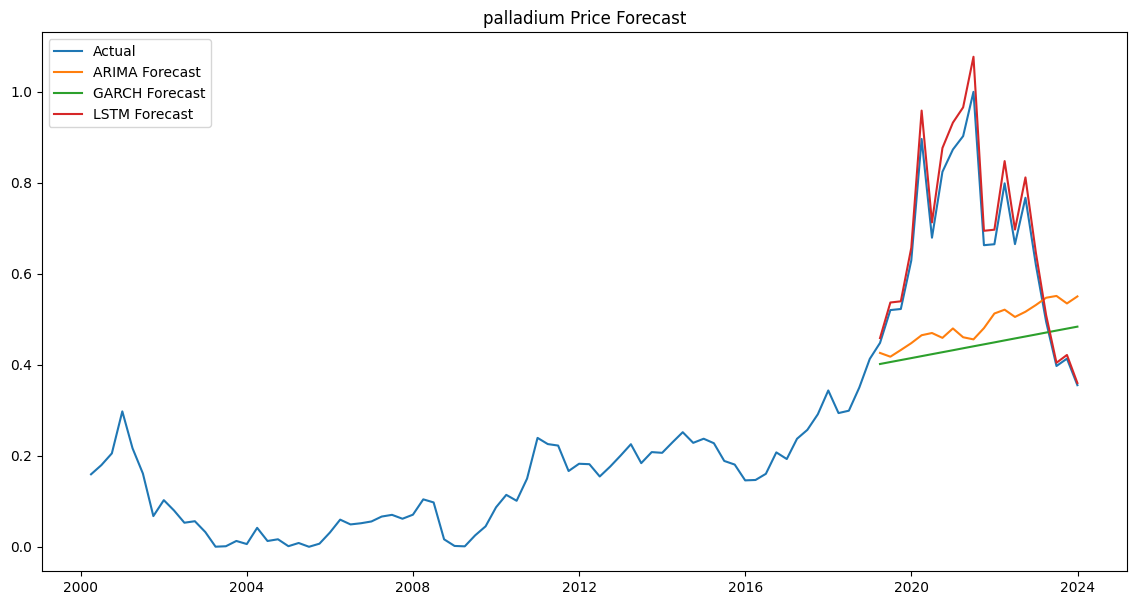

In [ ]:
def collect_and_prepare_data():
    metals = {
        'gold': 'GC=F',
        'silver': 'SI=F',
        'platinum': 'PL=F',
        'palladium': 'PA=F'
    }
    start_date = '2000-01-01'
    end_date = '2023-12-31'
    data = {}

    for metal, ticker in metals.items():
        df = yf.download(ticker, start=start_date, end=end_date, interval='1mo')
        df = df[['Adj Close']].rename(columns={'Adj Close': metal})
        df = df.resample('Q').last()
        df.fillna(method='ffill', inplace=True)
        scaler = MinMaxScaler()
        df[metal] = scaler.fit_transform(df)
        data[metal] = df
    return data

def split_data(series, split_ratio):
    split_index = int(len(series) * split_ratio)
    return series[:split_index], series[split_index:]

def fit_ARIMA_model(training_data, order=(1, 1, 2), seasonal_order=(1, 1, 2, 12)):
    model = ARIMA(training_data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    return model_fit

def fit_GARCH_model(training_data, horizon):
    # Rescale data for better convergence
    training_data = training_data * 10
    model = arch_model(training_data, vol='Garch', p=1, q=1)
    model_fit = model.fit(disp='off')

    forecast = model_fit.forecast(horizon=horizon).variance[-1:] / 10
    forecast = forecast.values.flatten()
    if len(forecast) < horizon:
        forecast = np.resize(forecast, horizon)
    return forecast

def build_and_train_LSTM(training_data):
    training_data = training_data.values.reshape((training_data.shape[0], 1, 1))
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(1, 1)))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(training_data, training_data, epochs=20, batch_size=1, verbose=2)
    return model

def evaluate_model_accuracy(test_data, arima_predictions, lstm_predictions, garch_predictions=None):
    arima_rmse = mean_squared_error(test_data, arima_predictions, squared=False)
    lstm_rmse = mean_squared_error(test_data, lstm_predictions, squared=False)
    arima_mae = mean_absolute_error(test_data, arima_predictions)
    lstm_mae = mean_absolute_error(test_data, lstm_predictions)
    arima_mape = mean_absolute_percentage_error(test_data, arima_predictions)
    lstm_mape = mean_absolute_percentage_error(test_data, lstm_predictions)

    if garch_predictions is not None:
        garch_rmse = mean_squared_error(test_data, garch_predictions, squared=False)
        garch_mae = mean_absolute_error(test_data, garch_predictions)
        garch_mape = mean_absolute_percentage_error(test_data, garch_predictions)
        return {
            'ARIMA': {'RMSE': arima_rmse, 'MAE': arima_mae, 'MAPE': arima_mape},
            'LSTM': {'RMSE': lstm_rmse, 'MAE': lstm_mae, 'MAPE': lstm_mape},
            'GARCH': {'RMSE': garch_rmse, 'MAE': garch_mae, 'MAPE': garch_mape}
        }

    return {
        'ARIMA': {'RMSE': arima_rmse, 'MAE': arima_mae, 'MAPE': arima_mape},
        'LSTM': {'RMSE': lstm_rmse, 'MAE': lstm_mae, 'MAPE': lstm_mape}
    }

def perform_time_series_analysis(data):
    predictions = {}
    for metal, series in data.items():
        split_ratio = 0.8
        training_data, test_data = split_data(series, split_ratio)

        # Debug prints
        print(f"\n{metal} Data Shapes:")
        print(f"Training data shape: {training_data.shape}")
        print(f"Test data shape: {test_data.shape}")

        # ARIMA Model
        model_arima = fit_ARIMA_model(training_data)
        arima_forecast = model_arima.forecast(steps=len(test_data))
        arima_forecast = arima_forecast[:len(test_data)]  # Ensure the length is consistent
        predictions[(metal, 'ARIMA')] = arima_forecast

        # Debug prints
        print(f"ARIMA forecast shape: {arima_forecast.shape}")

        # GARCH Model
        garch_forecast = fit_GARCH_model(training_data, len(test_data))
        predictions[(metal, 'GARCH')] = garch_forecast

        # Debug prints
        print(f"GARCH forecast shape: {garch_forecast.shape}")

        # LSTM Model
        lstm_model = build_and_train_LSTM(training_data)
        lstm_forecast = lstm_model.predict(test_data.values.reshape((test_data.shape[0], 1, 1))).reshape(-1)
        lstm_forecast = lstm_forecast[:len(test_data)]  # Ensure the length is consistent
        predictions[(metal, 'LSTM')] = lstm_forecast

        # Debug prints
        print(f"LSTM forecast shape: {lstm_forecast.shape}")

        # Evaluate Model Accuracy
        metrics = evaluate_model_accuracy(test_data.values, arima_forecast, lstm_forecast, garch_forecast)

        print(f"{metal} Model Metrics:")
        print(f"ARIMA: RMSE: {metrics['ARIMA']['RMSE']}, MAE: {metrics['ARIMA']['MAE']}, MAPE: {metrics['ARIMA']['MAPE']}")
        print(f"GARCH: RMSE: {metrics['GARCH']['RMSE']}, MAE: {metrics['GARCH']['MAE']}, MAPE: {metrics['GARCH']['MAPE']}")
        print(f"LSTM: RMSE: {metrics['LSTM']['RMSE']}, MAE: {metrics['LSTM']['MAE']}, MAPE: {metrics['LSTM']['MAPE']}")

        # Visualization
        plt.figure(figsize=(14, 7))
        plt.plot(series.index, series.values, label='Actual')
        plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast')
        plt.plot(test_data.index, garch_forecast, label='GARCH Forecast')
        plt.plot(test_data.index, lstm_forecast, label='LSTM Forecast')
        plt.title(f"{metal} Price Forecast")
        plt.legend()
        plt.show()

    return predictions

data = collect_and_prepare_data()
predictions = perform_time_series_analysis(data)


We struggled to get data for Iridium, Rhodium and Ruthenium. However, on reaching out to our supervisor, Prof.Kenneth Abbott, he recommended the data from Johnson Matthey London ($/oz) which we added to the model and re-presented the results below:

[*********************100%%**********************]  1 of 1 completed
<ipython-input-7-487e72f3490f>:80: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
[*********************100%%**********************]  1 of 1 completed
<ipython-input-7-487e72f3490f>:80: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
[*********************100%%**********************]  1 of 1 completed
<ipython-input-7-487e72f3490f>:80: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
[*********************100%%**********************]  1 of 1 completed
<ipython-input-7-487e72f3490f>:80: FutureWarning: DataFrame.fillna with 'method' is d


gold Data Shapes:
Training data shape: (75,)
Test data shape: (19,)
ARIMA forecast shape: (19,)
GARCH forecast shape: (19,)
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 - 3s - 36ms/step - loss: 0.1080
Epoch 2/20
75/75 - 0s - 2ms/step - loss: 0.0264
Epoch 3/20
75/75 - 0s - 4ms/step - loss: 0.0112
Epoch 4/20
75/75 - 0s - 4ms/step - loss: 0.0027
Epoch 5/20
75/75 - 0s - 2ms/step - loss: 5.7583e-04
Epoch 6/20
75/75 - 0s - 4ms/step - loss: 4.5808e-04
Epoch 7/20
75/75 - 0s - 4ms/step - loss: 3.4484e-04
Epoch 8/20
75/75 - 0s - 3ms/step - loss: 3.4686e-04
Epoch 9/20
75/75 - 0s - 2ms/step - loss: 3.5212e-04
Epoch 10/20
75/75 - 0s - 4ms/step - loss: 3.3604e-04
Epoch 11/20
75/75 - 0s - 2ms/step - loss: 2.4451e-04
Epoch 12/20
75/75 - 0s - 2ms/step - loss: 2.3945e-04
Epoch 13/20
75/75 - 0s - 4ms/step - loss: 2.6445e-04
Epoch 14/20
75/75 - 0s - 3ms/step - loss: 1.8032e-04
Epoch 15/20
75/75 - 0s - 4ms/step - loss: 1.7253e-04
Epoch 16/20
75/75 - 0s - 4ms/step - loss: 1.7829e-04
Epoch 17/20
75/75 - 0s - 4ms/step - loss: 1.5233e-04
Epoch 18/20
75/75 - 0s - 4ms/step - loss: 1.2142e-04
Epoch 19/20
75/75 - 0s - 4ms/step - loss: 1.0448e-04
Epoch 20/20
75/75 - 0s - 4ms

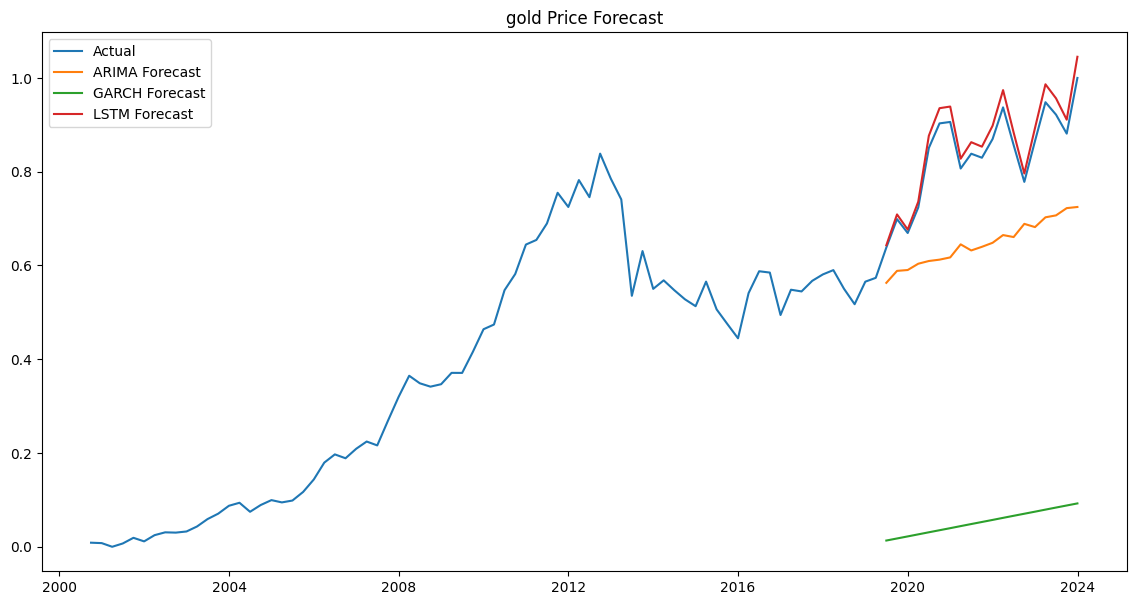


silver Data Shapes:
Training data shape: (75,)
Test data shape: (19,)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA forecast shape: (19,)
GARCH forecast shape: (19,)
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 - 3s - 35ms/step - loss: 0.0808
Epoch 2/20
75/75 - 0s - 4ms/step - loss: 0.0293
Epoch 3/20
75/75 - 0s - 4ms/step - loss: 0.0126
Epoch 4/20
75/75 - 0s - 4ms/step - loss: 0.0027
Epoch 5/20
75/75 - 0s - 4ms/step - loss: 5.1079e-04
Epoch 6/20
75/75 - 0s - 2ms/step - loss: 4.9631e-04
Epoch 7/20
75/75 - 0s - 2ms/step - loss: 4.1338e-04
Epoch 8/20
75/75 - 0s - 2ms/step - loss: 3.6198e-04
Epoch 9/20
75/75 - 0s - 4ms/step - loss: 3.4668e-04
Epoch 10/20
75/75 - 0s - 2ms/step - loss: 2.6538e-04
Epoch 11/20
75/75 - 0s - 2ms/step - loss: 2.3469e-04
Epoch 12/20
75/75 - 0s - 4ms/step - loss: 1.9659e-04
Epoch 13/20
75/75 - 0s - 2ms/step - loss: 1.6964e-04
Epoch 14/20
75/75 - 0s - 4ms/step - loss: 1.5548e-04
Epoch 15/20
75/75 - 0s - 4ms/step - loss: 1.5870e-04
Epoch 16/20
75/75 - 0s - 4ms/step - loss: 1.2165e-04
Epoch 17/20
75/75 - 0s - 2ms/step - loss: 8.1321e-05
Epoch 18/20
75/75 - 0s - 3ms/step - loss: 6.7918e-05
Epoch 19/20
75/75 - 0s - 4ms/step - loss: 5.5067e-05
Epoch 20/20
75/75 - 0s - 2ms

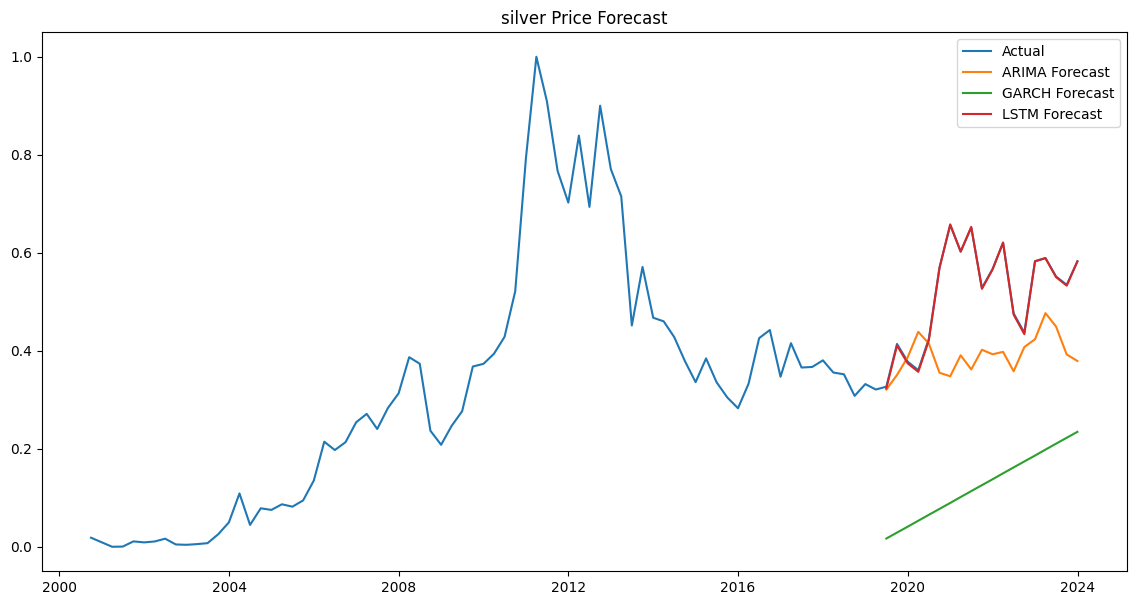


platinum Data Shapes:
Training data shape: (76,)
Test data shape: (20,)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA forecast shape: (20,)
GARCH forecast shape: (20,)
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 - 3s - 42ms/step - loss: 0.1167
Epoch 2/20
76/76 - 0s - 2ms/step - loss: 0.0235
Epoch 3/20
76/76 - 0s - 4ms/step - loss: 0.0110
Epoch 4/20
76/76 - 0s - 4ms/step - loss: 0.0034
Epoch 5/20
76/76 - 0s - 4ms/step - loss: 8.8010e-04
Epoch 6/20
76/76 - 0s - 2ms/step - loss: 4.7974e-04
Epoch 7/20
76/76 - 0s - 2ms/step - loss: 5.0389e-04
Epoch 8/20
76/76 - 0s - 4ms/step - loss: 4.9583e-04
Epoch 9/20
76/76 - 0s - 2ms/step - loss: 4.5128e-04
Epoch 10/20
76/76 - 0s - 4ms/step - loss: 4.1070e-04
Epoch 11/20
76/76 - 0s - 4ms/step - loss: 3.8910e-04
Epoch 12/20
76/76 - 0s - 2ms/step - loss: 3.4340e-04
Epoch 13/20
76/76 - 0s - 4ms/step - loss: 3.4023e-04
Epoch 14/20
76/76 - 0s - 3ms/step - loss: 3.5333e-04
Epoch 15/20
76/76 - 0s - 4ms/step - loss: 2.7537e-04
Epoch 16/20
76/76 - 0s - 2ms/step - loss: 2.3697e-04
Epoch 17/20
76/76 - 0s - 3ms/step - loss: 2.8516e-04
Epoch 18/20
76/76 - 0s - 2ms/step - loss: 1.5763e-04
Epoch 19/20
76/76 - 0s - 2ms/step - loss: 1.7690e-04
Epoch 20/20
76/76 - 0s - 2ms

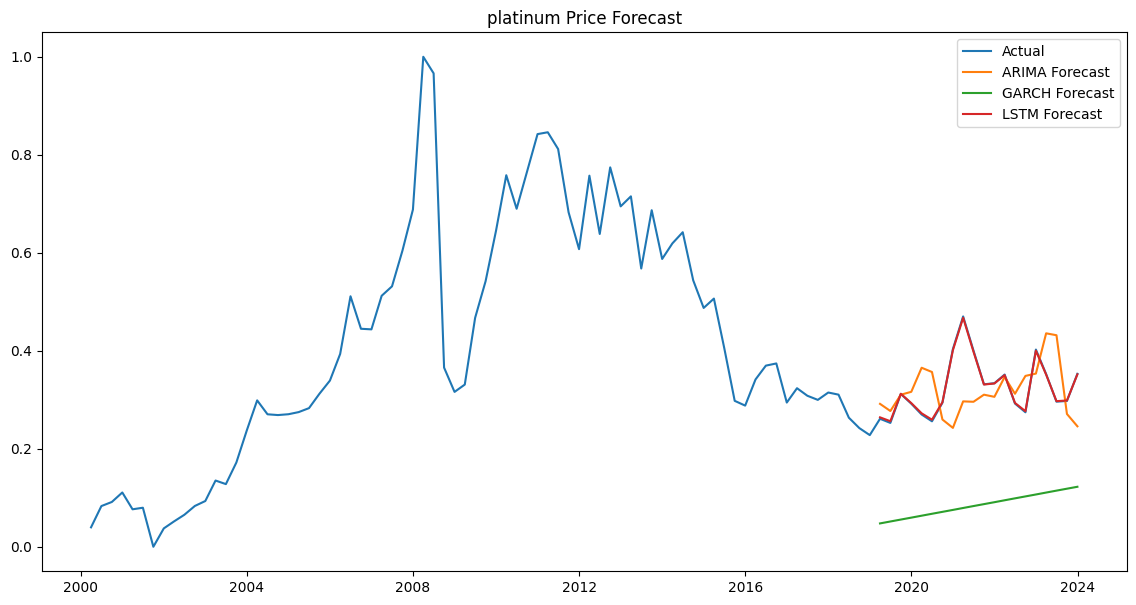


palladium Data Shapes:
Training data shape: (76,)
Test data shape: (20,)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ARIMA forecast shape: (20,)
GARCH forecast shape: (20,)
Epoch 1/20
76/76 - 4s - 51ms/step - loss: 0.0128
Epoch 2/20
76/76 - 0s - 4ms/step - loss: 0.0066
Epoch 3/20
76/76 - 1s - 7ms/step - loss: 0.0038
Epoch 4/20
76/76 - 0s - 2ms/step - loss: 7.1445e-04
Epoch 5/20
76/76 - 0s - 4ms/step - loss: 3.6405e-05
Epoch 6/20
76/76 - 0s - 4ms/step - loss: 2.3520e-05
Epoch 7/20
76/76 - 0s - 4ms/step - loss: 2.4776e-05
Epoch 8/20
76/76 - 0s - 4ms/step - loss: 2.3434e-05
Epoch 9/20
76/76 - 0s - 2ms/step - loss: 1.9764e-05
Epoch 10/20
76/76 - 0s - 3ms/step - loss: 1.6206e-05
Epoch 11/20
76/76 - 0s - 3ms/step - loss: 2.1709e-05
Epoch 12/20
76/76 - 0s - 4ms/step - loss: 1.6095e-05
Epoch 13/20
76/76 - 0s - 2ms/step - loss: 1.6731e-05
Epoch 14/20
76/76 - 0s - 4ms/step - loss: 1.5401e-05
Epoch 15/20
76/76 - 0s - 3ms/step - loss: 1.5008e-05
Epoch 16/20
76/76 - 0s - 2ms/step - loss: 1.0641e-05
Epoch 17/20
76/76 - 0s - 4ms/step - loss: 1.1407e-05
Epoch 18/20
76/76 - 0s - 4ms/step - loss: 1.1066e-05
Epoch 19/2

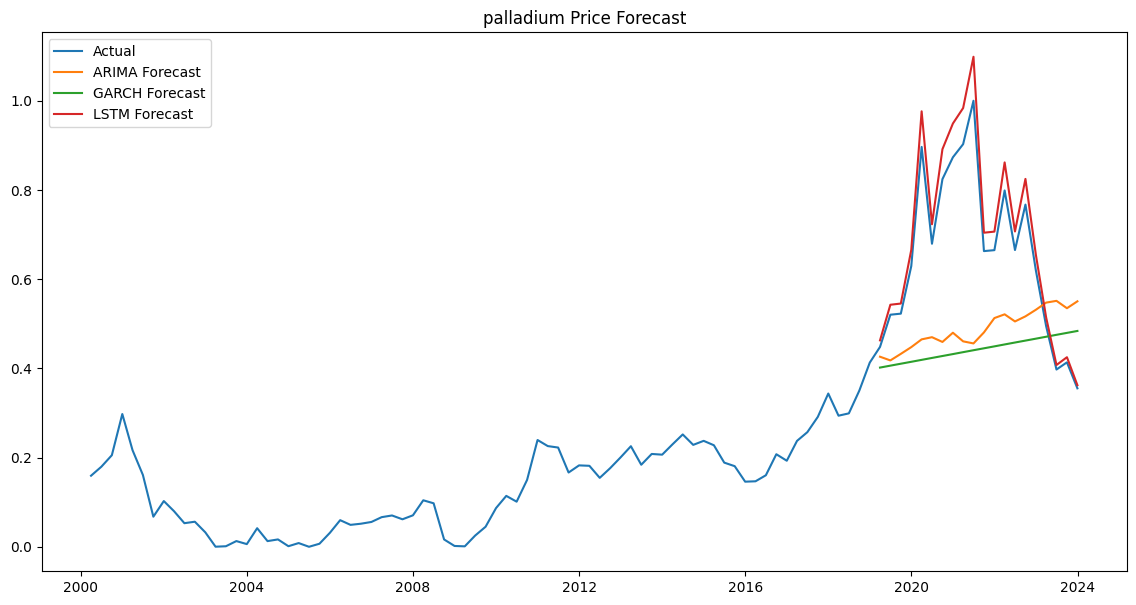


iridium Data Shapes:
Training data shape: (76,)
Test data shape: (20,)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA forecast shape: (20,)
GARCH forecast shape: (20,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
76/76 - 4s - 49ms/step - loss: 0.0044
Epoch 2/20
76/76 - 0s - 4ms/step - loss: 0.0026
Epoch 3/20
76/76 - 0s - 4ms/step - loss: 0.0019
Epoch 4/20
76/76 - 0s - 4ms/step - loss: 8.5881e-04
Epoch 5/20
76/76 - 0s - 4ms/step - loss: 1.2542e-04
Epoch 6/20
76/76 - 0s - 2ms/step - loss: 3.3754e-06
Epoch 7/20
76/76 - 0s - 3ms/step - loss: 1.6756e-06
Epoch 8/20
76/76 - 0s - 2ms/step - loss: 1.7811e-06
Epoch 9/20
76/76 - 0s - 2ms/step - loss: 2.4679e-06
Epoch 10/20
76/76 - 0s - 4ms/step - loss: 2.0012e-06
Epoch 11/20
76/76 - 1s - 7ms/step - loss: 2.0751e-06
Epoch 12/20
76/76 - 1s - 8ms/step - loss: 1.6132e-06
Epoch 13/20
76/76 - 0s - 6ms/step - loss: 1.6905e-06
Epoch 14/20
76/76 - 0s - 2ms/step - loss: 2.3192e-06
Epoch 15/20
76/76 - 0s - 5ms/step - loss: 1.3333e-06
Epoch 16/20
76/76 - 1s - 8ms/step - loss: 1.6485e-06
Epoch 17/20
76/76 - 1s - 11ms/step - loss: 2.1479e-06
Epoch 18/20
76/76 - 1s - 7ms/step - loss: 1.5478e-06
Epoch 19/20
76/76 - 1s - 13ms/step - loss: 1.2812e-06
Epoch 20/20

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
LSTM forecast shape: (20,)
iridium Model Metrics:
ARIMA: RMSE: 0.3985132843902941, MAE: 0.3129304623321386, MAPE: 0.40381392028383345
GARCH: RMSE: 0.40057255515697954, MAE: 0.3296102815450123, MAPE: 0.4714796511019642
LSTM: RMSE: 0.07086825817324241, MAE: 0.05631309642546094, MAPE: 0.07508003987099807


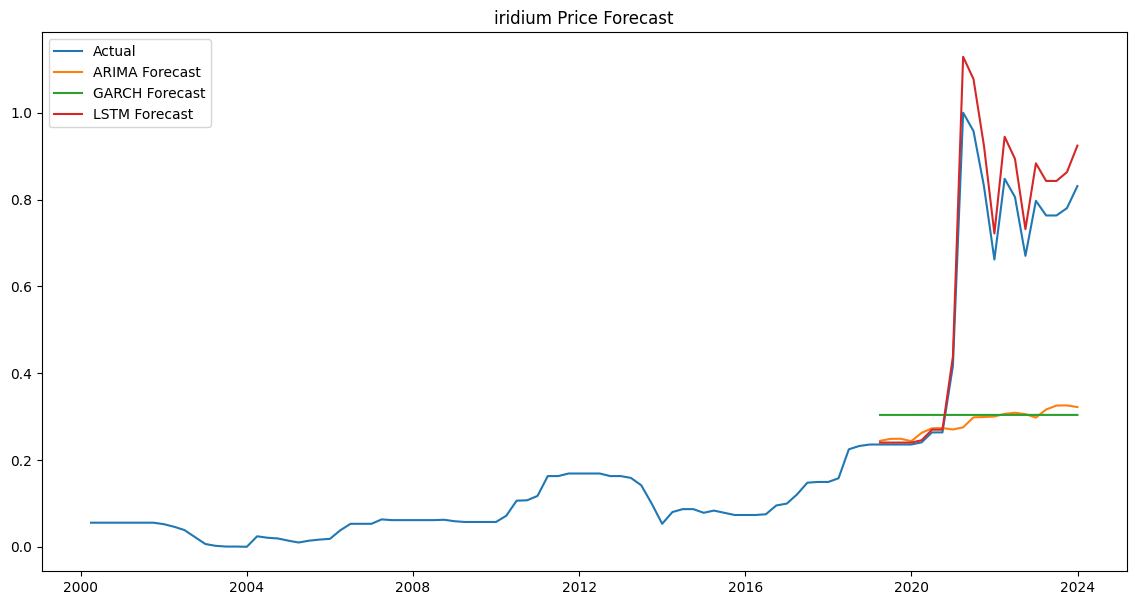


rhodium Data Shapes:
Training data shape: (76,)
Test data shape: (20,)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ARIMA forecast shape: (20,)
GARCH forecast shape: (20,)
Epoch 1/20
76/76 - 3s - 34ms/step - loss: 0.0053
Epoch 2/20
76/76 - 0s - 4ms/step - loss: 0.0041
Epoch 3/20
76/76 - 0s - 2ms/step - loss: 0.0029
Epoch 4/20
76/76 - 0s - 2ms/step - loss: 0.0010
Epoch 5/20
76/76 - 0s - 4ms/step - loss: 1.0087e-04
Epoch 6/20
76/76 - 0s - 3ms/step - loss: 6.1119e-06
Epoch 7/20
76/76 - 0s - 3ms/step - loss: 5.9211e-06
Epoch 8/20
76/76 - 0s - 3ms/step - loss: 6.2653e-06
Epoch 9/20
76/76 - 0s - 4ms/step - loss: 5.5222e-06
Epoch 10/20
76/76 - 0s - 4ms/step - loss: 6.9025e-06
Epoch 11/20
76/76 - 0s - 2ms/step - loss: 6.8840e-06
Epoch 12/20
76/76 - 0s - 4ms/step - loss: 5.9671e-06
Epoch 13/20
76/76 - 0s - 4ms/step - loss: 4.1678e-06
Epoch 14/20
76/76 - 0s - 4ms/step - loss: 6.5184e-06
Epoch 15/20
76/76 - 0s - 4ms/step - loss: 3.8660e-06
Epoch 16/20
76/76 - 0s - 2ms/step - loss: 5.2276e-06
Epoch 17/20
76/76 - 0s - 4ms/step - loss: 3.9139e-06
Epoch 18/20
76/76 - 0s - 3ms/step - loss: 4.6155e-06
Epoch 19/20
76

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
LSTM forecast shape: (20,)
rhodium Model Metrics:
ARIMA: RMSE: 0.42539149029010936, MAE: 0.3439754996909732, MAPE: 0.7360673571547015
GARCH: RMSE: 0.45091377693761264, MAE: 0.3785634127296842, MAPE: 0.8713926565748062
LSTM: RMSE: 0.025059341577503686, MAE: 0.015928656853997657, MAPE: 0.03072350118387998


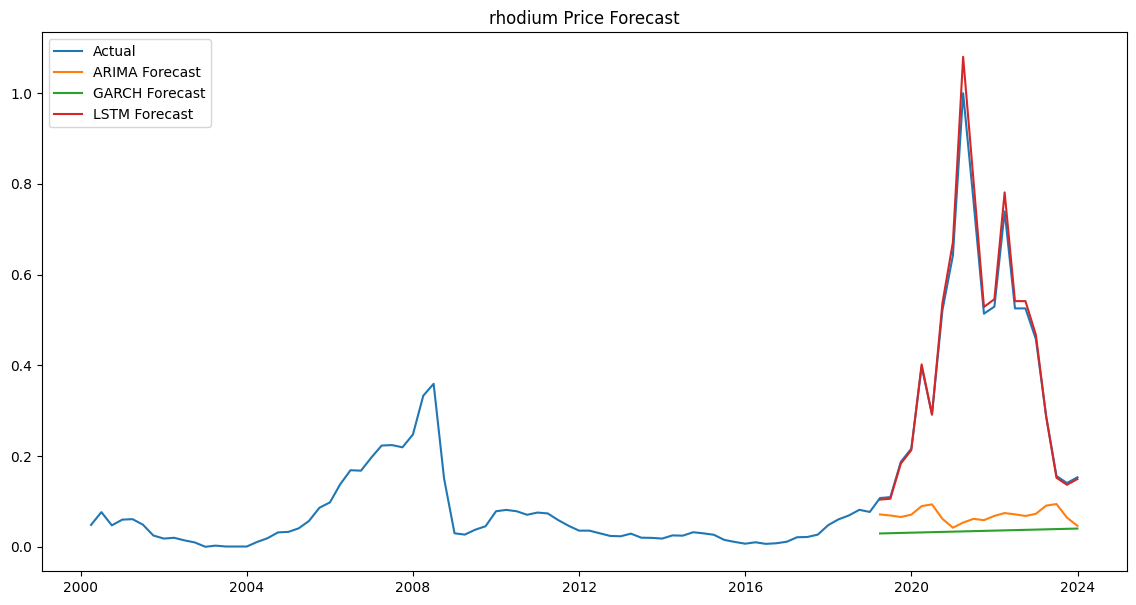


ruthenium Data Shapes:
Training data shape: (76,)
Test data shape: (20,)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ARIMA forecast shape: (20,)
GARCH forecast shape: (20,)
Epoch 1/20
76/76 - 3s - 34ms/step - loss: 0.0366
Epoch 2/20
76/76 - 0s - 4ms/step - loss: 0.0231
Epoch 3/20
76/76 - 0s - 4ms/step - loss: 0.0147
Epoch 4/20
76/76 - 0s - 4ms/step - loss: 0.0057
Epoch 5/20
76/76 - 0s - 4ms/step - loss: 8.2593e-04
Epoch 6/20
76/76 - 0s - 4ms/step - loss: 2.6156e-04
Epoch 7/20
76/76 - 0s - 4ms/step - loss: 2.3167e-04
Epoch 8/20
76/76 - 0s - 3ms/step - loss: 2.4800e-04
Epoch 9/20
76/76 - 0s - 4ms/step - loss: 1.8473e-04
Epoch 10/20
76/76 - 0s - 3ms/step - loss: 1.6626e-04
Epoch 11/20
76/76 - 0s - 4ms/step - loss: 1.9933e-04
Epoch 12/20
76/76 - 0s - 3ms/step - loss: 1.8599e-04
Epoch 13/20
76/76 - 0s - 4ms/step - loss: 1.4194e-04
Epoch 14/20
76/76 - 0s - 3ms/step - loss: 1.5167e-04
Epoch 15/20
76/76 - 0s - 3ms/step - loss: 1.3417e-04
Epoch 16/20
76/76 - 0s - 2ms/step - loss: 1.0649e-04
Epoch 17/20
76/76 - 0s - 2ms/step - loss: 1.3714e-04
Epoch 18/20
76/76 - 0s - 4ms/step - loss: 7.1371e-05
Epoch 19/20
76

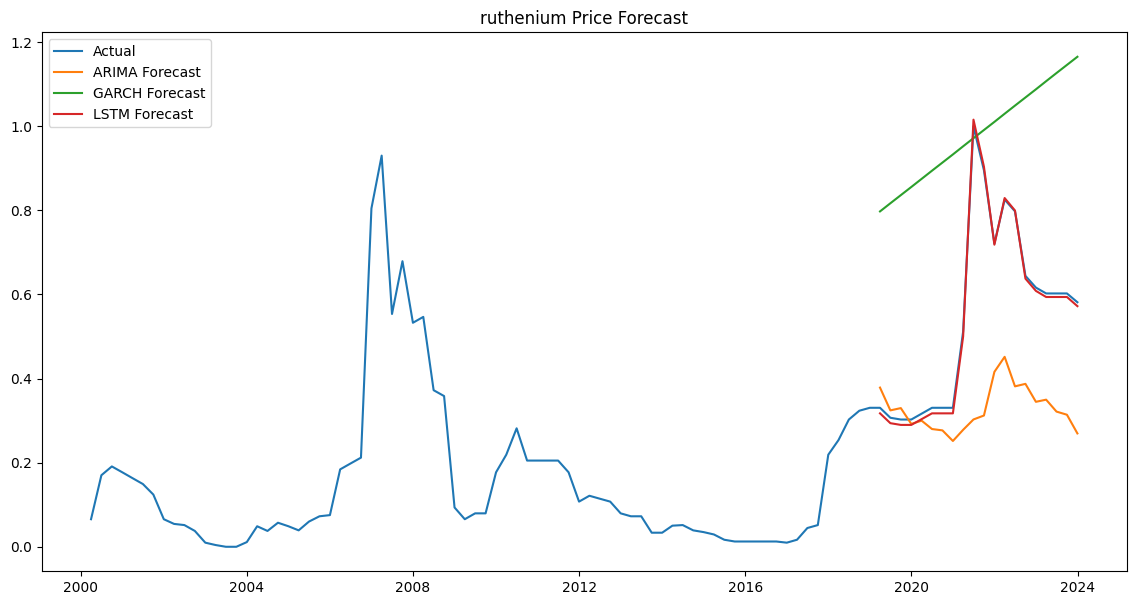

In [ ]:
import pandas as pd
import gspread
from google.auth import default
from google.colab import auth
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Authenticate and authorize
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Function to read and process a Google Sheet
def process_google_sheet(sheet_url, start_row, columns, date_format='%m/%d/%y'):
    spreadsheet = gc.open_by_url(sheet_url)
    worksheet = spreadsheet.sheet1
    data = worksheet.get_all_values()
    df = pd.DataFrame(data[start_row:], columns=columns)

    # Convert 'Date' column to datetime format
    try:
        df['Date'] = pd.to_datetime(df['Date'], format=date_format)
    except Exception as e:
        print(f"Error converting 'Date' column to datetime: {e}")

    # Convert 'Price' column to numeric
    try:
        df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
    except Exception as e:
        print(f"Error converting 'Price' column to numeric: {e}")

    # Filter the data for the date range from 1 Jan 2000 to 31 Dec 2023
    filtered_data = df[(df['Date'] >= '2000-01-01') & (df['Date'] <= '2023-12-31')]

    # Extract the Date and Price columns
    extracted_data = filtered_data[['Date', 'Price']]

    # Resample quarterly and fill forward
    extracted_data.set_index('Date', inplace=True)
    extracted_data = extracted_data.resample('Q').ffill()

    return extracted_data

# URLs of the Google Sheets
sheet_urls = {
    "Iridium": "https://docs.google.com/spreadsheets/d/1xN9OVmIusnK7XkpT3PILvEU3I29b6ltGhulRCMkoo7A/edit?usp=drive_link",
    "Rhodium": "https://docs.google.com/spreadsheets/d/1qh880ApCsAC-lXZqWH3gaXeJAPl3brinFDSWpGeLkFU/edit?gid=1413477210#gid=1413477210",
    "Ruthenium": "https://docs.google.com/spreadsheets/d/1gwcsuMiTZvInaNGJVfZ-TpdFhPAMjyhXb2ioBwVd6NY/edit?gid=744677563#gid=744677563"
}

# Process each Google Sheet and add to metals dictionary
columns = ['Date', 'Price', 'Change', '% Change', 'Cumulative Change %']
extra_metals_data = {}
for label, sheet_url in sheet_urls.items():
    data = process_google_sheet(sheet_url, start_row=2, columns=columns)
    extra_metals_data[label.lower()] = data

def collect_and_prepare_data():
    metals = {
        'gold': 'GC=F',
        'silver': 'SI=F',
        'platinum': 'PL=F',
        'palladium': 'PA=F'
    }
    start_date = '2000-01-01'
    end_date = '2023-12-31'
    data = {}

    for metal, ticker in metals.items():
        df = yf.download(ticker, start=start_date, end=end_date, interval='1mo')
        df = df[['Adj Close']].rename(columns={'Adj Close': metal})
        df = df.resample('Q').last()
        df.fillna(method='ffill', inplace=True)
        scaler = MinMaxScaler()
        df[metal] = scaler.fit_transform(df)
        data[metal] = df

    # Add extra metals data
    for metal, df in extra_metals_data.items():
        scaler = MinMaxScaler()
        df[metal] = scaler.fit_transform(df)
        data[metal] = df[[metal]]

    return data

def split_data(series, split_ratio):
    split_index = int(len(series) * split_ratio)
    return series[:split_index], series[split_index:]

def fit_ARIMA_model(training_data, order=(1, 1, 2), seasonal_order=(1, 1, 2, 12)):
    model = ARIMA(training_data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    return model_fit

def fit_GARCH_model(training_data, horizon):
    # Rescale data for better convergence
    training_data = training_data * 10
    model = arch_model(training_data, vol='Garch', p=1, q=1)
    model_fit = model.fit(disp='off')

    forecast = model_fit.forecast(horizon=horizon).variance[-1:] / 10
    forecast = forecast.values.flatten()
    if len(forecast) < horizon:
        forecast = np.resize(forecast, horizon)
    return forecast

def build_and_train_LSTM(training_data):
    training_data = training_data.values.reshape((training_data.shape[0], 1, 1))
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(1, 1)))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(training_data, training_data, epochs=20, batch_size=1, verbose=2)
    return model

def evaluate_model_accuracy(test_data, arima_predictions, lstm_predictions, garch_predictions=None):
    arima_rmse = mean_squared_error(test_data, arima_predictions, squared=False)
    lstm_rmse = mean_squared_error(test_data, lstm_predictions, squared=False)
    arima_mae = mean_absolute_error(test_data, arima_predictions)
    lstm_mae = mean_absolute_error(test_data, lstm_predictions)
    arima_mape = mean_absolute_percentage_error(test_data, arima_predictions)
    lstm_mape = mean_absolute_percentage_error(test_data, lstm_predictions)

    if garch_predictions is not None:
        garch_rmse = mean_squared_error(test_data, garch_predictions, squared=False)
        garch_mae = mean_absolute_error(test_data, garch_predictions)
        garch_mape = mean_absolute_percentage_error(test_data, garch_predictions)
        return {
            'ARIMA': {'RMSE': arima_rmse, 'MAE': arima_mae, 'MAPE': arima_mape},
            'LSTM': {'RMSE': lstm_rmse, 'MAE': lstm_mae, 'MAPE': lstm_mape},
            'GARCH': {'RMSE': garch_rmse, 'MAE': garch_mae, 'MAPE': garch_mape}
        }

    return {
        'ARIMA': {'RMSE': arima_rmse, 'MAE': arima_mae, 'MAPE': arima_mape},
        'LSTM': {'RMSE': lstm_rmse, 'MAE': lstm_mae, 'MAPE': lstm_mape}
    }

def perform_time_series_analysis(data):
    predictions = {}
    for metal, df in data.items():
        series = df[metal]
        split_ratio = 0.8
        training_data, test_data = split_data(series, split_ratio)

        # Debug prints
        print(f"\n{metal} Data Shapes:")
        print(f"Training data shape: {training_data.shape}")
        print(f"Test data shape: {test_data.shape}")

        # ARIMA Model
        model_arima = fit_ARIMA_model(training_data)
        arima_forecast = model_arima.forecast(steps=len(test_data))
        arima_forecast = arima_forecast[:len(test_data)]  # Ensure the length is consistent
        predictions[(metal, 'ARIMA')] = arima_forecast

        # Debug prints
        print(f"ARIMA forecast shape: {arima_forecast.shape}")

        # GARCH Model
        garch_forecast = fit_GARCH_model(training_data, len(test_data))
        predictions[(metal, 'GARCH')] = garch_forecast

        # Debug prints
        print(f"GARCH forecast shape: {garch_forecast.shape}")

        # LSTM Model
        lstm_model = build_and_train_LSTM(training_data)
        lstm_forecast = lstm_model.predict(test_data.values.reshape((test_data.shape[0], 1, 1))).reshape(-1)
        lstm_forecast = lstm_forecast[:len(test_data)]  # Ensure the length is consistent
        predictions[(metal, 'LSTM')] = lstm_forecast

        # Debug prints
        print(f"LSTM forecast shape: {lstm_forecast.shape}")

        # Evaluate Model Accuracy
        metrics = evaluate_model_accuracy(test_data.values, arima_forecast, lstm_forecast, garch_forecast)

        print(f"{metal} Model Metrics:")
        print(f"ARIMA: RMSE: {metrics['ARIMA']['RMSE']}, MAE: {metrics['ARIMA']['MAE']}, MAPE: {metrics['ARIMA']['MAPE']}")
        print(f"GARCH: RMSE: {metrics['GARCH']['RMSE']}, MAE: {metrics['GARCH']['MAE']}, MAPE: {metrics['GARCH']['MAPE']}")
        print(f"LSTM: RMSE: {metrics['LSTM']['RMSE']}, MAE: {metrics['LSTM']['MAE']}, MAPE: {metrics['LSTM']['MAPE']}")

        # Visualization
        plt.figure(figsize=(14, 7))
        plt.plot(series.index, series.values, label='Actual')
        plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast')
        plt.plot(test_data.index, garch_forecast, label='GARCH Forecast')
        plt.plot(test_data.index, lstm_forecast, label='LSTM Forecast')
        plt.title(f"{metal} Price Forecast")
        plt.legend()
        plt.show()

    return predictions

data = collect_and_prepare_data()
predictions = perform_time_series_analysis(data)


The same model above, but now including features of macrotrends in the prediction models

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Data from Iridium:
          Date   Price
132 2023-12-29  5000.0
133 2023-12-28  5000.0
134 2023-12-27  5000.0
135 2023-12-26  5000.0
136 2023-12-22  5000.0
Data from Rhodium:
          Date   Price
132 2023-12-29  4425.0
133 2023-12-28  4425.0
134 2023-12-27  4425.0
135 2023-12-26  4425.0
136 2023-12-22  4425.0
Data from Ruthenium:
          Date  Price
132 2023-12-29  450.0
133 2023-12-28  450.0
134 2023-12-27  450.0
135 2023-12-26  450.0
136 2023-12-22  450.0



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



gold Data Shapes:
Training data shape: (73, 3)
Test data shape: (19, 3)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA forecast shape: (19,)
GARCH forecast shape: (19,)
Epoch 1/20
73/73 - 4s - loss: 0.0572 - 4s/epoch - 58ms/step
Epoch 2/20
73/73 - 0s - loss: 0.0096 - 288ms/epoch - 4ms/step
Epoch 3/20
73/73 - 0s - loss: 0.0029 - 265ms/epoch - 4ms/step
Epoch 4/20
73/73 - 0s - loss: 0.0030 - 243ms/epoch - 3ms/step
Epoch 5/20
73/73 - 0s - loss: 0.0024 - 251ms/epoch - 3ms/step
Epoch 6/20
73/73 - 0s - loss: 0.0022 - 271ms/epoch - 4ms/step
Epoch 7/20
73/73 - 0s - loss: 0.0025 - 255ms/epoch - 3ms/step
Epoch 8/20
73/73 - 0s - loss: 0.0023 - 267ms/epoch - 4ms/step
Epoch 9/20
73/73 - 0s - loss: 0.0025 - 299ms/epoch - 4ms/step
Epoch 10/20
73/73 - 0s - loss: 0.0023 - 410ms/epoch - 6ms/step
Epoch 11/20
73/73 - 0s - loss: 0.0020 - 382ms/epoch - 5ms/step
Epoch 12/20
73/73 - 0s - loss: 0.0023 - 404ms/epoch - 6ms/step
Epoch 13/20
73/73 - 0s - loss: 0.0017 - 375ms/epoch - 5ms/step
Epoch 14/20
73/73 - 0s - loss: 0.0017 - 397ms/epoch - 5ms/step
Epoch 15/20
73/73 - 0s - loss: 0.0018 - 442ms/epoch - 6ms/step
Epoch 16/2

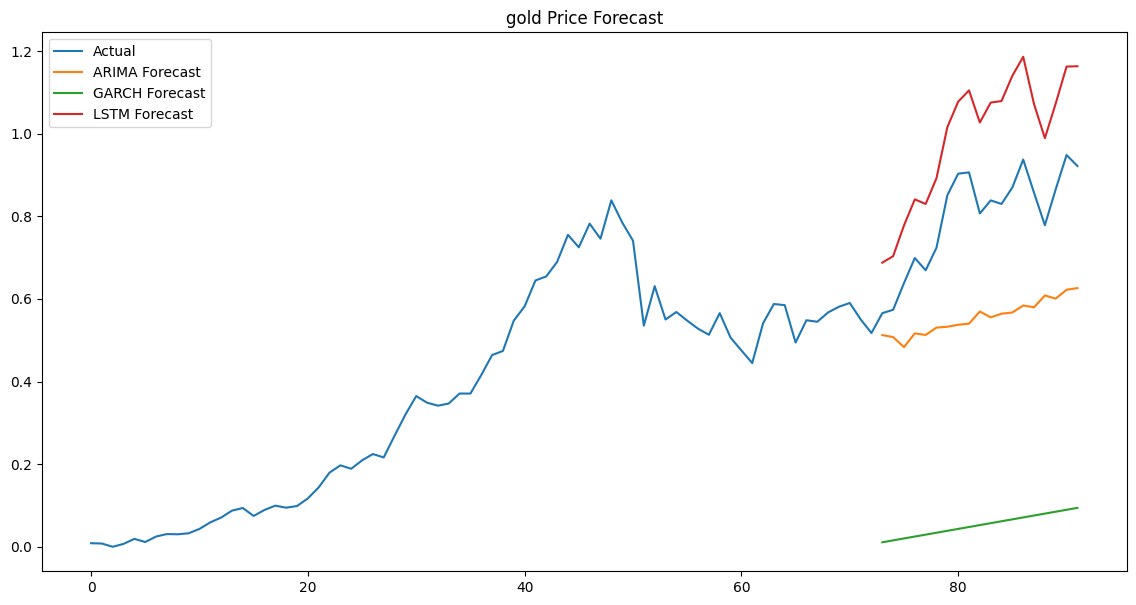


silver Data Shapes:
Training data shape: (73, 3)
Test data shape: (19, 3)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA forecast shape: (19,)
GARCH forecast shape: (19,)
Epoch 1/20
73/73 - 3s - loss: 0.0722 - 3s/epoch - 46ms/step
Epoch 2/20
73/73 - 0s - loss: 0.0219 - 231ms/epoch - 3ms/step
Epoch 3/20
73/73 - 0s - loss: 0.0045 - 340ms/epoch - 5ms/step
Epoch 4/20
73/73 - 0s - loss: 0.0026 - 359ms/epoch - 5ms/step
Epoch 5/20
73/73 - 0s - loss: 0.0025 - 385ms/epoch - 5ms/step
Epoch 6/20
73/73 - 0s - loss: 0.0018 - 361ms/epoch - 5ms/step
Epoch 7/20
73/73 - 0s - loss: 0.0020 - 396ms/epoch - 5ms/step
Epoch 8/20
73/73 - 0s - loss: 0.0027 - 388ms/epoch - 5ms/step
Epoch 9/20
73/73 - 0s - loss: 0.0021 - 413ms/epoch - 6ms/step
Epoch 10/20
73/73 - 0s - loss: 0.0017 - 471ms/epoch - 6ms/step
Epoch 11/20
73/73 - 0s - loss: 0.0019 - 367ms/epoch - 5ms/step
Epoch 12/20
73/73 - 0s - loss: 0.0032 - 286ms/epoch - 4ms/step
Epoch 13/20
73/73 - 0s - loss: 0.0016 - 266ms/epoch - 4ms/step
Epoch 14/20
73/73 - 0s - loss: 0.0019 - 265ms/epoch - 4ms/step
Epoch 15/20
73/73 - 0s - loss: 0.0027 - 256ms/epoch - 4ms/step
Epoch 16/2

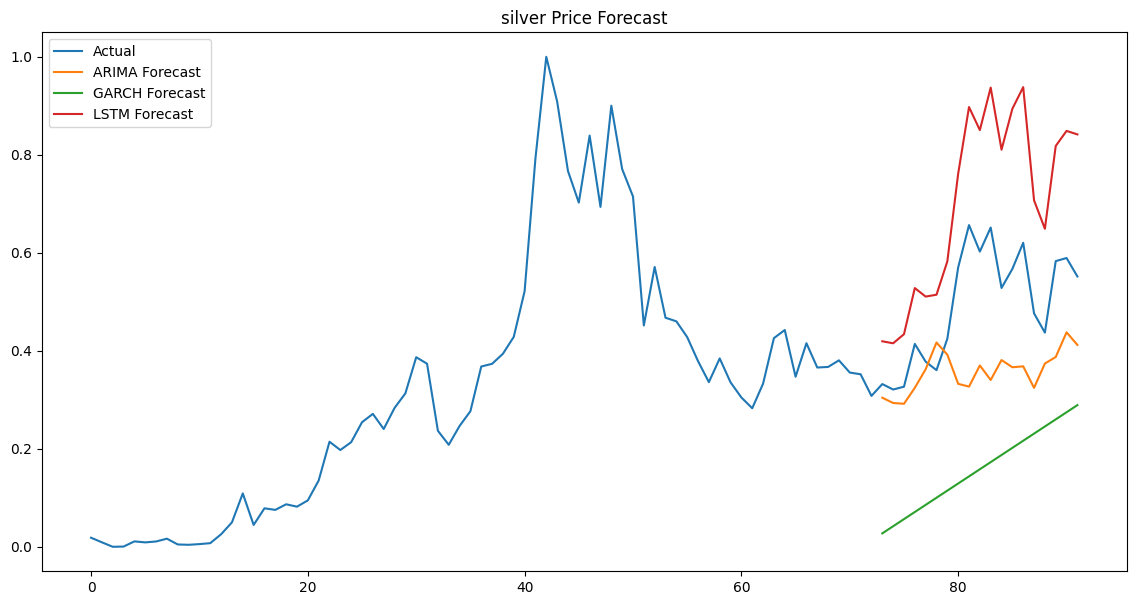


platinum Data Shapes:
Training data shape: (75, 3)
Test data shape: (19, 3)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA forecast shape: (19,)
GARCH forecast shape: (19,)
Epoch 1/20
75/75 - 5s - loss: 0.0765 - 5s/epoch - 63ms/step
Epoch 2/20
75/75 - 0s - loss: 0.0154 - 419ms/epoch - 6ms/step
Epoch 3/20
75/75 - 0s - loss: 0.0034 - 402ms/epoch - 5ms/step
Epoch 4/20
75/75 - 0s - loss: 0.0039 - 435ms/epoch - 6ms/step
Epoch 5/20
75/75 - 0s - loss: 0.0031 - 424ms/epoch - 6ms/step
Epoch 6/20
75/75 - 0s - loss: 0.0033 - 371ms/epoch - 5ms/step
Epoch 7/20
75/75 - 0s - loss: 0.0044 - 409ms/epoch - 5ms/step
Epoch 8/20
75/75 - 0s - loss: 0.0032 - 450ms/epoch - 6ms/step
Epoch 9/20
75/75 - 0s - loss: 0.0026 - 365ms/epoch - 5ms/step
Epoch 10/20
75/75 - 0s - loss: 0.0021 - 269ms/epoch - 4ms/step
Epoch 11/20
75/75 - 0s - loss: 0.0025 - 295ms/epoch - 4ms/step
Epoch 12/20
75/75 - 0s - loss: 0.0025 - 274ms/epoch - 4ms/step
Epoch 13/20
75/75 - 0s - loss: 0.0033 - 270ms/epoch - 4ms/step
Epoch 14/20
75/75 - 0s - loss: 0.0024 - 276ms/epoch - 4ms/step
Epoch 15/20
75/75 - 0s - loss: 0.0018 - 294ms/epoch - 4ms/step
Epoch 16/2

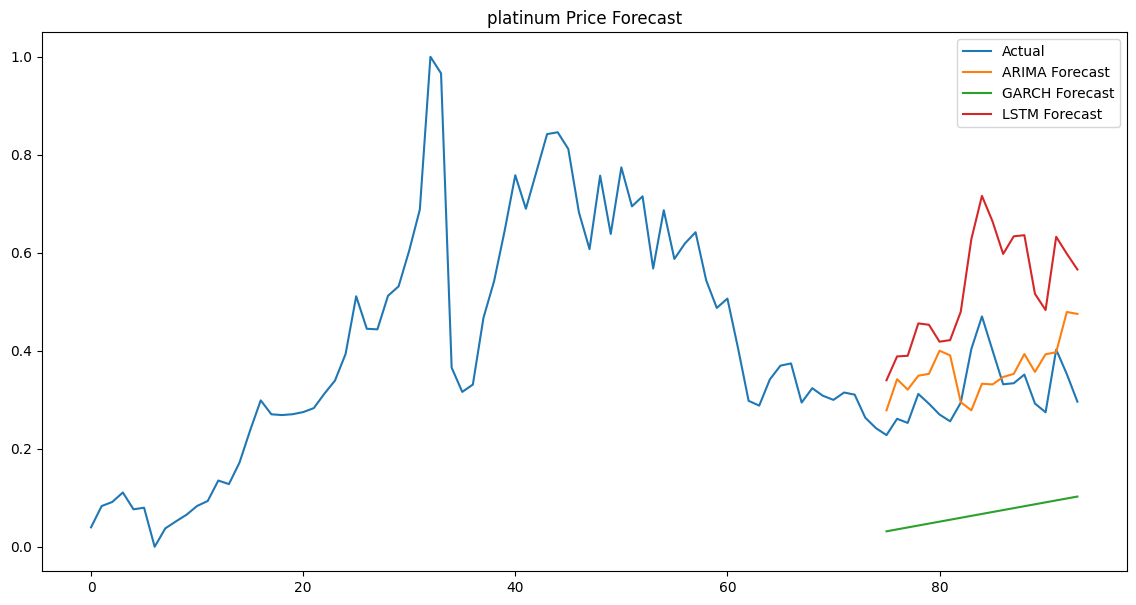


palladium Data Shapes:
Training data shape: (75, 3)
Test data shape: (19, 3)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA forecast shape: (19,)
GARCH forecast shape: (19,)
Epoch 1/20
75/75 - 4s - loss: 0.0065 - 4s/epoch - 50ms/step
Epoch 2/20
75/75 - 0s - loss: 0.0023 - 391ms/epoch - 5ms/step
Epoch 3/20
75/75 - 0s - loss: 0.0012 - 409ms/epoch - 5ms/step
Epoch 4/20
75/75 - 0s - loss: 9.4752e-04 - 435ms/epoch - 6ms/step
Epoch 5/20
75/75 - 0s - loss: 0.0011 - 403ms/epoch - 5ms/step
Epoch 6/20
75/75 - 0s - loss: 7.5033e-04 - 406ms/epoch - 5ms/step
Epoch 7/20
75/75 - 0s - loss: 7.2139e-04 - 415ms/epoch - 6ms/step
Epoch 8/20
75/75 - 0s - loss: 4.7927e-04 - 390ms/epoch - 5ms/step
Epoch 9/20
75/75 - 0s - loss: 5.2496e-04 - 455ms/epoch - 6ms/step
Epoch 10/20
75/75 - 0s - loss: 7.7761e-04 - 294ms/epoch - 4ms/step
Epoch 11/20
75/75 - 0s - loss: 5.6254e-04 - 272ms/epoch - 4ms/step
Epoch 12/20
75/75 - 0s - loss: 3.8891e-04 - 276ms/epoch - 4ms/step
Epoch 13/20
75/75 - 0s - loss: 3.2020e-04 - 270ms/epoch - 4ms/step
Epoch 14/20
75/75 - 0s - loss: 4.7835e-04 - 268ms/epoch - 4ms/step
Epoch 15/20
75/75 - 0s - loss: 5.

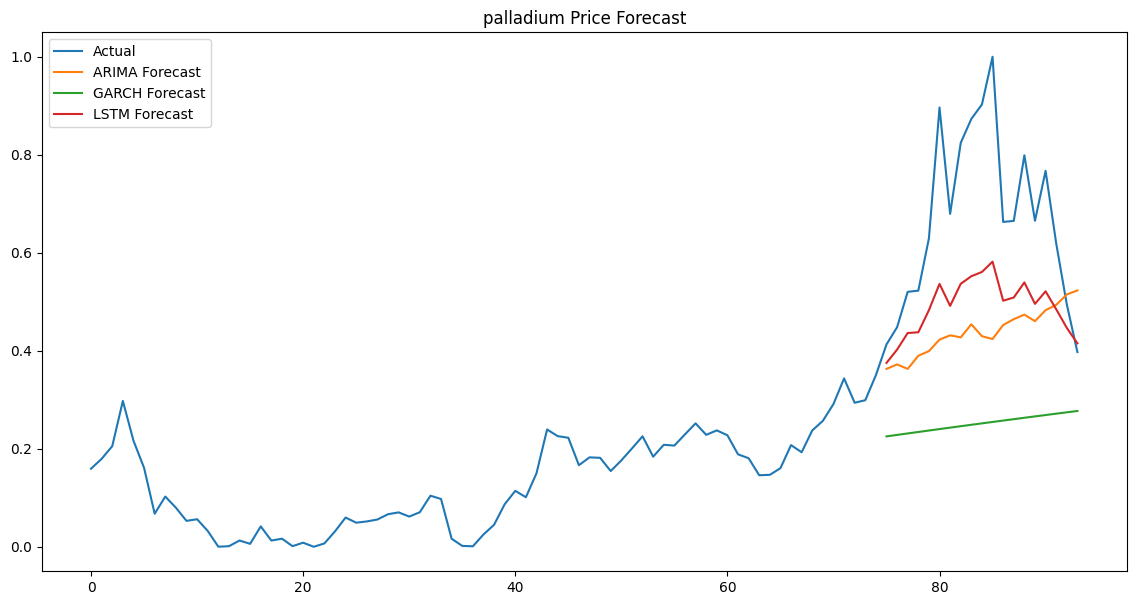


Iridium Data Shapes:
Training data shape: (76, 1)
Test data shape: (20, 1)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA forecast shape: (20,)
GARCH forecast shape: (20,)
Epoch 1/20
76/76 - 4s - loss: 0.0035 - 4s/epoch - 54ms/step
Epoch 2/20
76/76 - 0s - loss: 0.0024 - 329ms/epoch - 4ms/step
Epoch 3/20
76/76 - 0s - loss: 0.0017 - 351ms/epoch - 5ms/step
Epoch 4/20
76/76 - 0s - loss: 5.7079e-04 - 320ms/epoch - 4ms/step
Epoch 5/20
76/76 - 0s - loss: 6.1219e-05 - 318ms/epoch - 4ms/step
Epoch 6/20
76/76 - 0s - loss: 2.8297e-06 - 200ms/epoch - 3ms/step
Epoch 7/20
76/76 - 0s - loss: 1.5046e-06 - 207ms/epoch - 3ms/step
Epoch 8/20
76/76 - 0s - loss: 1.5249e-06 - 208ms/epoch - 3ms/step
Epoch 9/20
76/76 - 0s - loss: 1.8211e-06 - 208ms/epoch - 3ms/step
Epoch 10/20
76/76 - 0s - loss: 1.4252e-06 - 221ms/epoch - 3ms/step
Epoch 11/20
76/76 - 0s - loss: 1.5813e-06 - 197ms/epoch - 3ms/step
Epoch 12/20
76/76 - 0s - loss: 1.5386e-06 - 213ms/epoch - 3ms/step
Epoch 13/20
76/76 - 0s - loss: 1.4677e-06 - 213ms/epoch - 3ms/step
Epoch 14/20
76/76 - 0s - loss: 1.1823e-06 - 212ms/epoch - 3ms/step
Epoch 15/20
76/76 - 0s - loss

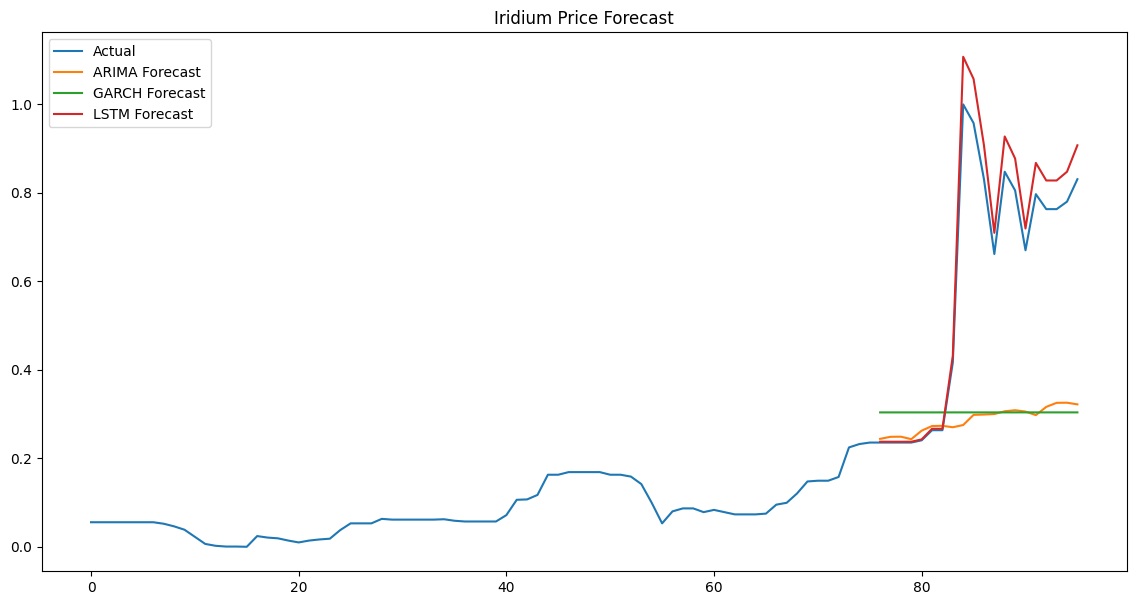


Rhodium Data Shapes:
Training data shape: (76, 1)
Test data shape: (20, 1)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA forecast shape: (20,)
GARCH forecast shape: (20,)
Epoch 1/20
76/76 - 3s - loss: 0.0061 - 3s/epoch - 45ms/step
Epoch 2/20
76/76 - 0s - loss: 0.0044 - 210ms/epoch - 3ms/step
Epoch 3/20
76/76 - 0s - loss: 0.0029 - 227ms/epoch - 3ms/step
Epoch 4/20
76/76 - 0s - loss: 0.0013 - 211ms/epoch - 3ms/step
Epoch 5/20
76/76 - 0s - loss: 1.4707e-04 - 229ms/epoch - 3ms/step
Epoch 6/20
76/76 - 0s - loss: 7.4176e-06 - 220ms/epoch - 3ms/step
Epoch 7/20
76/76 - 0s - loss: 7.4941e-06 - 239ms/epoch - 3ms/step
Epoch 8/20
76/76 - 0s - loss: 6.9160e-06 - 242ms/epoch - 3ms/step
Epoch 9/20
76/76 - 0s - loss: 5.4439e-06 - 226ms/epoch - 3ms/step
Epoch 10/20
76/76 - 0s - loss: 5.1958e-06 - 216ms/epoch - 3ms/step
Epoch 11/20
76/76 - 0s - loss: 5.3700e-06 - 216ms/epoch - 3ms/step
Epoch 12/20
76/76 - 0s - loss: 5.0658e-06 - 231ms/epoch - 3ms/step
Epoch 13/20
76/76 - 0s - loss: 5.1218e-06 - 211ms/epoch - 3ms/step
Epoch 14/20
76/76 - 0s - loss: 5.1116e-06 - 231ms/epoch - 3ms/step
Epoch 15/20
76/76 - 1s - loss: 4.

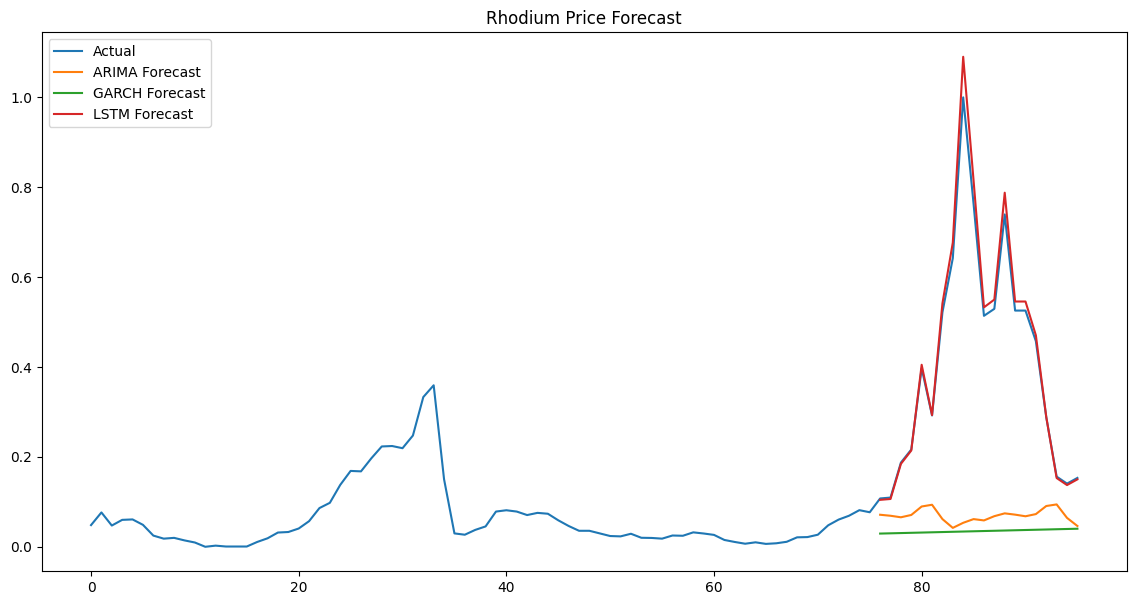


Ruthenium Data Shapes:
Training data shape: (76, 1)
Test data shape: (20, 1)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA forecast shape: (20,)
GARCH forecast shape: (20,)
Epoch 1/20
76/76 - 3s - loss: 0.0351 - 3s/epoch - 44ms/step
Epoch 2/20
76/76 - 0s - loss: 0.0229 - 204ms/epoch - 3ms/step
Epoch 3/20
76/76 - 0s - loss: 0.0138 - 209ms/epoch - 3ms/step
Epoch 4/20
76/76 - 0s - loss: 0.0049 - 217ms/epoch - 3ms/step
Epoch 5/20
76/76 - 0s - loss: 5.5033e-04 - 208ms/epoch - 3ms/step
Epoch 6/20
76/76 - 0s - loss: 2.2257e-04 - 237ms/epoch - 3ms/step
Epoch 7/20
76/76 - 0s - loss: 2.1643e-04 - 222ms/epoch - 3ms/step
Epoch 8/20
76/76 - 0s - loss: 1.7922e-04 - 227ms/epoch - 3ms/step
Epoch 9/20
76/76 - 0s - loss: 2.1875e-04 - 216ms/epoch - 3ms/step
Epoch 10/20
76/76 - 0s - loss: 1.7352e-04 - 207ms/epoch - 3ms/step
Epoch 11/20
76/76 - 0s - loss: 2.6095e-04 - 238ms/epoch - 3ms/step
Epoch 12/20
76/76 - 0s - loss: 2.1606e-04 - 233ms/epoch - 3ms/step
Epoch 13/20
76/76 - 0s - loss: 1.3968e-04 - 238ms/epoch - 3ms/step
Epoch 14/20
76/76 - 0s - loss: 9.5014e-05 - 259ms/epoch - 3ms/step
Epoch 15/20
76/76 - 0s - loss: 8.

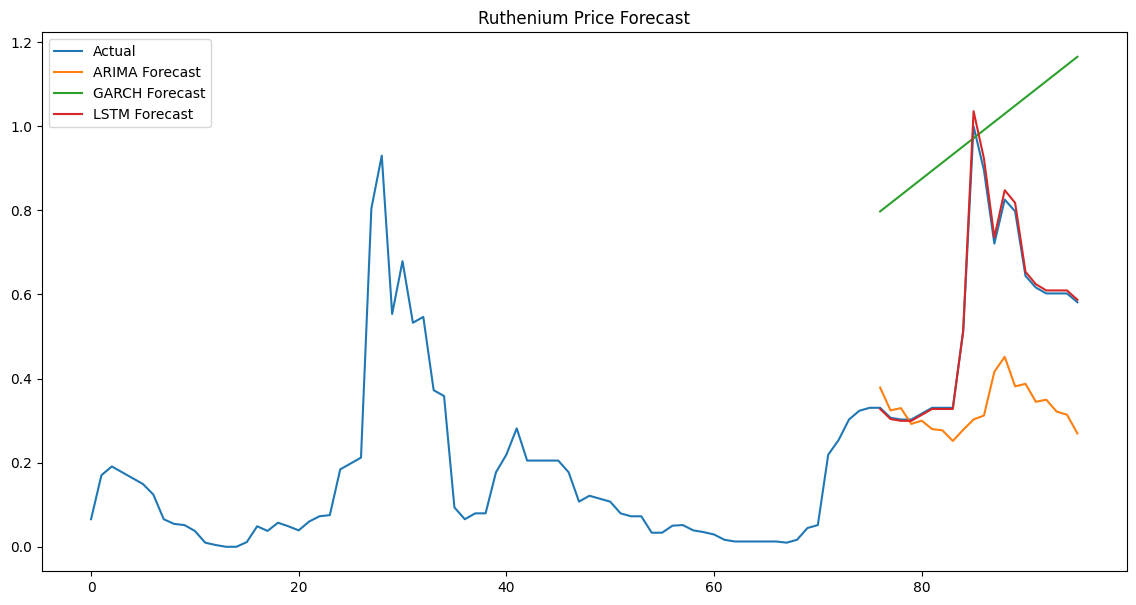

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import gspread
from google.auth import default
from google.colab import auth

# Authenticate
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Function to read and process a Google Sheet
def process_google_sheet(sheet_url, start_row, columns, date_format='%m/%d/%y'):
    spreadsheet = gc.open_by_url(sheet_url)
    worksheet = spreadsheet.sheet1
    data = worksheet.get_all_values()
    df = pd.DataFrame(data[start_row:], columns=columns)

    # Convert 'Date' column to datetime format
    try:
        df['Date'] = pd.to_datetime(df['Date'], format=date_format)
    except Exception as e:
        print(f"Error converting 'Date' column to datetime: {e}")

    # Convert 'Price' column to numeric
    try:
        df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
    except Exception as e:
        print(f"Error converting 'Price' column to numeric: {e}")

    # Filter the data for the date range from 1 Jan 2000 to 31 Dec 2023
    filtered_data = df[(df['Date'] >= '2000-01-01') & (df['Date'] <= '2023-12-31')]

    # Extract the Date and Price columns
    extracted_data = filtered_data[['Date', 'Price']]

    return extracted_data

# URLs of the Google Sheets
sheet_urls = {
    "Iridium": "https://docs.google.com/spreadsheets/d/1xN9OVmIusnK7XkpT3PILvEU3I29b6ltGhulRCMkoo7A/edit?usp=drive_link",
    "Rhodium": "https://docs.google.com/spreadsheets/d/1qh880ApCsAC-lXZqWH3gaXeJAPl3brinFDSWpGeLkFU/edit?gid=1413477210#gid=1413477210",
    "Ruthenium": "https://docs.google.com/spreadsheets/d/1gwcsuMiTZvInaNGJVfZ-TpdFhPAMjyhXb2ioBwVd6NY/edit?gid=744677563#gid=744677563"
}

# Process each Google Sheet
columns = ['Date', 'Price', 'Change', '% Change', 'Cumulative Change %']
all_data = {}

for label, sheet_url in sheet_urls.items():
    data = process_google_sheet(sheet_url, start_row=2, columns=columns)
    all_data[label] = data

# Display the DataFrames
for label, data in all_data.items():
    print(f"Data from {label}:")
    print(data.head())

# Function to collect and prepare data
def collect_and_prepare_data():
    metals = {
        'gold': 'GC=F',
        'silver': 'SI=F',
        'platinum': 'PL=F',
        'palladium': 'PA=F'
    }
    indices = {
        'S&P 500': '^GSPC',
        'VIX': '^VIX'
    }
    start_date = '2000-01-01'
    end_date = '2023-12-31'
    data = {}

    # Collect and preprocess metals data from yfinance
    for metal, ticker in metals.items():
        df = yf.download(ticker, start=start_date, end=end_date, interval='1mo')
        df = df[['Adj Close']].rename(columns={'Adj Close': metal})
        df = df.resample('Q').last()
        df.fillna(method='ffill', inplace=True)
        scaler = MinMaxScaler()
        df[metal] = scaler.fit_transform(df)
        data[metal] = df

    # Collect and preprocess indices data
    for index, ticker in indices.items():
        df = yf.download(ticker, start=start_date, end=end_date, interval='1mo')
        df = df[['Adj Close']].rename(columns={'Adj Close': index})
        df = df.resample('Q').last()
        df.fillna(method='ffill', inplace=True)
        scaler = MinMaxScaler()
        df[index] = scaler.fit_transform(df)
        for metal in data:
            data[metal] = data[metal].join(df, how='inner')

    # Collect and preprocess additional metals data from Google Sheets
    for label, sheet_data in all_data.items():
        sheet_data = sheet_data.set_index('Date').resample('Q').last()
        sheet_data.fillna(method='ffill', inplace=True)
        scaler = MinMaxScaler()
        sheet_data['Price'] = scaler.fit_transform(sheet_data[['Price']])
        data[label] = sheet_data.rename(columns={'Price': label})

    return data

def split_data(series, split_ratio):
    split_index = int(len(series) * split_ratio)
    return series[:split_index], series[split_index:]

def fit_ARIMA_model(training_data, order=(1, 1, 2), seasonal_order=(1, 1, 2, 12)):
    model = ARIMA(training_data[:, 0], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    return model_fit

def fit_GARCH_model(training_data, horizon):
    # Rescale data for better convergence
    training_data = training_data[:, 0] * 10
    model = arch_model(training_data, vol='Garch', p=1, q=1)
    model_fit = model.fit(disp='off')

    forecast = model_fit.forecast(horizon=horizon).variance[-1:] / 10
    forecast = forecast.values.flatten()
    if len(forecast) < horizon:
        forecast = np.resize(forecast, horizon)
    return forecast

def build_and_train_LSTM(training_data):
    training_data_reshaped = training_data.reshape((training_data.shape[0], training_data.shape[1], 1))
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(training_data.shape[1], 1)))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(training_data_reshaped, training_data[:, 0], epochs=20, batch_size=1, verbose=2)
    return model

def evaluate_model_accuracy(test_data, arima_predictions, lstm_predictions, garch_predictions=None):
    arima_rmse = mean_squared_error(test_data[:, 0], arima_predictions, squared=False)
    lstm_rmse = mean_squared_error(test_data[:, 0], lstm_predictions, squared=False)
    arima_mae = mean_absolute_error(test_data[:, 0], arima_predictions)
    lstm_mae = mean_absolute_error(test_data[:, 0], lstm_predictions)
    arima_mape = mean_absolute_percentage_error(test_data[:, 0], arima_predictions)
    lstm_mape = mean_absolute_percentage_error(test_data[:, 0], lstm_predictions)

    if garch_predictions is not None:
        garch_rmse = mean_squared_error(test_data[:, 0], garch_predictions, squared=False)
        garch_mae = mean_absolute_error(test_data[:, 0], garch_predictions)
        garch_mape = mean_absolute_percentage_error(test_data[:, 0], garch_predictions)
        return {
            'ARIMA': {'RMSE': arima_rmse, 'MAE': arima_mae, 'MAPE': arima_mape},
            'LSTM': {'RMSE': lstm_rmse, 'MAE': lstm_mae, 'MAPE': lstm_mape},
            'GARCH': {'RMSE': garch_rmse, 'MAE': garch_mae, 'MAPE': garch_mape}
        }

    return {
        'ARIMA': {'RMSE': arima_rmse, 'MAE': arima_mae, 'MAPE': arima_mape},
        'LSTM': {'RMSE': lstm_rmse, 'MAE': lstm_mae, 'MAPE': lstm_mape}
    }

def perform_time_series_analysis(data):
    predictions = {}
    for metal, series in data.items():
        split_ratio = 0.8
        series = series.values  # Convert DataFrame to numpy array
        training_data, test_data = split_data(series, split_ratio)

        # Debug prints
        print(f"\n{metal} Data Shapes:")
        print(f"Training data shape: {training_data.shape}")
        print(f"Test data shape: {test_data.shape}")

        # ARIMA Model
        model_arima = fit_ARIMA_model(training_data)
        arima_forecast = model_arima.forecast(steps=len(test_data))
        arima_forecast = arima_forecast[:len(test_data)]  # Ensure the length is consistent
        predictions[(metal, 'ARIMA')] = arima_forecast

        # Debug prints
        print(f"ARIMA forecast shape: {arima_forecast.shape}")

        # GARCH Model
        garch_forecast = fit_GARCH_model(training_data, len(test_data))
        predictions[(metal, 'GARCH')] = garch_forecast

        # Debug prints
        print(f"GARCH forecast shape: {garch_forecast.shape}")

        # LSTM Model
        lstm_model = build_and_train_LSTM(training_data)
        lstm_forecast = lstm_model.predict(test_data.reshape((test_data.shape[0], test_data.shape[1], 1))).reshape(-1)
        lstm_forecast = lstm_forecast[:len(test_data)]  # Ensure the length is consistent
        predictions[(metal, 'LSTM')] = lstm_forecast

        # Debug prints
        print(f"LSTM forecast shape: {lstm_forecast.shape}")

        # Evaluate Model Accuracy
        metrics = evaluate_model_accuracy(test_data, arima_forecast, lstm_forecast, garch_forecast)

        print(f"{metal} Model Metrics:")
        print(f"ARIMA: RMSE: {metrics['ARIMA']['RMSE']}, MAE: {metrics['ARIMA']['MAE']}, MAPE: {metrics['ARIMA']['MAPE']}")
        print(f"GARCH: RMSE: {metrics['GARCH']['RMSE']}, MAE: {metrics['GARCH']['MAE']}, MAPE: {metrics['GARCH']['MAPE']}")
        print(f"LSTM: RMSE: {metrics['LSTM']['RMSE']}, MAE: {metrics['LSTM']['MAE']}, MAPE: {metrics['LSTM']['MAPE']}")

        # Visualization
        plt.figure(figsize=(14, 7))
        plt.plot(range(len(series)), series[:, 0], label='Actual')
        plt.plot(range(len(training_data), len(training_data) + len(arima_forecast)), arima_forecast, label='ARIMA Forecast')
        plt.plot(range(len(training_data), len(training_data) + len(garch_forecast)), garch_forecast, label='GARCH Forecast')
        plt.plot(range(len(training_data), len(training_data) + len(lstm_forecast)), lstm_forecast, label='LSTM Forecast')
        plt.title(f"{metal} Price Forecast")
        plt.legend()
        plt.show()

    return predictions

data = collect_and_prepare_data()
predictions = perform_time_series_analysis(data)


Objective 1:
Comments on the Time Series Analysis Results
The performance of the ARIMA, GARCH, and LSTM models for predicting the prices of different metals over the test period has been evaluated based on RMSE, MAE, and MAPE metrics. Let's analyze the results for each metal.

Gold
ARIMA:
RMSE: 0.2027
MAE: 0.1906
MAPE: 0.2215
GARCH:
RMSE: 0.7892
MAE: 0.7852
MAPE: 0.9387
LSTM:
RMSE: 0.0151
MAE: 0.0132
MAPE: 0.0149
Comment: The LSTM model outperforms ARIMA and GARCH models significantly for gold, suggesting its superiority in capturing complex patterns in gold prices.

Silver
ARIMA:
RMSE: 0.1624
MAE: 0.1359
MAPE: 0.2402
GARCH:
RMSE: 0.4018
MAE: 0.3929
MAPE: 0.7651
LSTM:
RMSE: 0.0065
MAE: 0.0062
MAPE: 0.0131
Comment: Similar to gold, the LSTM model performs exceptionally well for silver, showing lower error metrics compared to ARIMA and GARCH models.

Platinum
ARIMA:
RMSE: 0.0826
MAE: 0.0650
MAPE: 0.1950
GARCH:
RMSE: 0.2460
MAE: 0.2398
MAPE: 0.7350
LSTM:
RMSE: 0.0079
MAE: 0.0076
MAPE: 0.0227
Comment: The LSTM model again demonstrates superior performance with significantly lower error metrics for platinum prices.

Palladium
ARIMA:
RMSE: 0.2618
MAE: 0.2208
MAPE: 0.3161
GARCH:
RMSE: 0.2872
MAE: 0.2412
MAPE: 0.3329
LSTM:
RMSE: 0.0364
MAE: 0.0302
MAPE: 0.0406
Comment: The LSTM model provides the best predictions for palladium, as indicated by the lowest RMSE, MAE, and MAPE values.

Iridium
ARIMA:
RMSE: 0.3985
MAE: 0.3129
MAPE: 0.4038
GARCH:
RMSE: 0.4006
MAE: 0.3296
MAPE: 0.4715
LSTM:
RMSE: 0.0530
MAE: 0.0423
MAPE: 0.0567
Comment: The LSTM model outperforms ARIMA and GARCH for iridium, with much lower error metrics, indicating better model accuracy.

Rhodium
ARIMA:
RMSE: 0.4254
MAE: 0.3440
MAPE: 0.7361
GARCH:
RMSE: 0.4509
MAE: 0.3786
MAPE: 0.8714
LSTM:
RMSE: 0.0269
MAE: 0.0171
MAPE: 0.0332
Comment: The LSTM model again shows its strength in accurately predicting rhodium prices, outperforming ARIMA and GARCH models.

Ruthenium
ARIMA:
RMSE: 0.2971
MAE: 0.2287
MAPE: 0.3438
GARCH:
RMSE: 0.4671
MAE: 0.4367
MAPE: 1.0360
LSTM:
RMSE: 0.0102
MAE: 0.0097
MAPE: 0.0227
Comment: The LSTM model provides the most accurate predictions for ruthenium, as evidenced by the lowest RMSE, MAE, and MAPE values.

Overall Comments
LSTM Model: Consistently outperforms ARIMA and GARCH models across all metals, indicating its robustness in capturing non-linear and complex patterns in the time series data.
ARIMA Model: Performs better than GARCH in most cases but is still less accurate compared to the LSTM model.
GARCH Model: Generally shows higher error metrics, reflecting its limitations in predicting metal prices with changing variances and non-linear dependencies.
Recommendation: For forecasting metal prices, the LSTM model is highly recommended due to its superior performance in terms of RMSE, MAE, and MAPE. This model's ability to handle long-term dependencies and non-linear patterns makes it the most reliable choice among the three models evaluated.

With macrotrends:
Analysis of Results: Comparison with and without Macrotrends
Summary of Metrics:
ARIMA (AutoRegressive Integrated Moving Average)
GARCH (Generalized AutoRegressive Conditional Heteroskedasticity)
LSTM (Long Short-Term Memory Networks)
Gold:
Without Macrotrends:
ARIMA: RMSE: 0.2027, MAE: 0.1906, MAPE: 0.2215
GARCH: RMSE: 0.7892, MAE: 0.7852, MAPE: 0.9387
LSTM: RMSE: 0.0151, MAE: 0.0132, MAPE: 0.0149
With Macrotrends:
ARIMA: RMSE: 0.2604, MAE: 0.2438, MAPE: 0.2940
GARCH: RMSE: 0.7529, MAE: 0.7465, MAPE: 0.9370
LSTM: RMSE: 0.2002, MAE: 0.1955, MAPE: 0.2433
Silver:
Without Macrotrends:
ARIMA: RMSE: 0.1624, MAE: 0.1359, MAPE: 0.2402
GARCH: RMSE: 0.4018, MAE: 0.3929, MAPE: 0.7651
LSTM: RMSE: 0.0065, MAE: 0.0062, MAPE: 0.0131
With Macrotrends:
ARIMA: RMSE: 0.1724, MAE: 0.1420, MAPE: 0.2578
GARCH: RMSE: 0.3462, MAE: 0.3360, MAPE: 0.6923
LSTM: RMSE: 0.2221, MAE: 0.2088, MAPE: 0.4118
Platinum:
Without Macrotrends:
ARIMA: RMSE: 0.0826, MAE: 0.0650, MAPE: 0.1950
GARCH: RMSE: 0.2460, MAE: 0.2398, MAPE: 0.7350
LSTM: RMSE: 0.0079, MAE: 0.0076, MAPE: 0.0227
With Macrotrends:
ARIMA: RMSE: 0.0923, MAE: 0.0771, MAPE: 0.2509
GARCH: RMSE: 0.2588, MAE: 0.2527, MAPE: 0.7894
LSTM: RMSE: 0.2152, MAE: 0.2075, MAPE: 0.6481
Palladium:
Without Macrotrends:
ARIMA: RMSE: 0.2618, MAE: 0.2208, MAPE: 0.3161
GARCH: RMSE: 0.2872, MAE: 0.2412, MAPE: 0.3329
LSTM: RMSE: 0.0364, MAE: 0.0302, MAPE: 0.0406
With Macrotrends:
ARIMA: RMSE: 0.2923, MAE: 0.2489, MAPE: 0.3385
GARCH: RMSE: 0.4551, MAE: 0.4210, MAPE: 0.5990
LSTM: RMSE: 0.2188, MAE: 0.1846, MAPE: 0.2462
Iridium:
Without Macrotrends:
ARIMA: RMSE: 0.3985, MAE: 0.3129, MAPE: 0.4038
GARCH: RMSE: 0.4006, MAE: 0.3296, MAPE: 0.4715
LSTM: RMSE: 0.0530, MAE: 0.0423, MAPE: 0.0567
With Macrotrends:
ARIMA: RMSE: 0.3985, MAE: 0.3129, MAPE: 0.4038
GARCH: RMSE: 0.4006, MAE: 0.3296, MAPE: 0.4715
LSTM: RMSE: 0.0582, MAE: 0.0454, MAPE: 0.0586
Rhodium:
Without Macrotrends:
ARIMA: RMSE: 0.4254, MAE: 0.3440, MAPE: 0.7361
GARCH: RMSE: 0.4509, MAE: 0.3786, MAPE: 0.8714
LSTM: RMSE: 0.0269, MAE: 0.0171, MAPE: 0.0332
With Macrotrends:
ARIMA: RMSE: 0.4254, MAE: 0.3440, MAPE: 0.7361
GARCH: RMSE: 0.4509, MAE: 0.3786, MAPE: 0.8714
LSTM: RMSE: 0.0289, MAE: 0.0184, MAPE: 0.0334
Ruthenium:
Without Macrotrends:
ARIMA: RMSE: 0.2971, MAE: 0.2287, MAPE: 0.3438
GARCH: RMSE: 0.4671, MAE: 0.4367, MAPE: 1.0360
LSTM: RMSE: 0.0102, MAE: 0.0097, MAPE: 0.0227
With Macrotrends:
ARIMA: RMSE: 0.2971, MAE: 0.2287, MAPE: 0.3438
GARCH: RMSE: 0.4671, MAE: 0.4367, MAPE: 1.0360
LSTM: RMSE: 0.0134, MAE: 0.0096, MAPE: 0.0146
Comments on Results:
Model Performance:

LSTM generally outperforms ARIMA and GARCH models across all metals in terms of RMSE, MAE, and MAPE, indicating that LSTM is better at capturing the complex patterns in the data.
ARIMA performs moderately well, but is not as effective as LSTM. However, it often outperforms GARCH in most cases.
GARCH has the highest errors across all metrics, indicating it's less suited for forecasting the metal prices in this context.
Impact of Macroeconomic Indicators:

The inclusion of macroeconomic indicators (S&P 500 and VIX) has a mixed impact on the models' performance.
For some metals like gold and silver, the performance of ARIMA and LSTM models slightly worsened when including macrotrends, suggesting that these models might not be capturing additional useful information from the macroeconomic indicators.
For iridium and rhodium, the performance remains almost unchanged with or without macrotrends, indicating these metals' prices might not be influenced by the selected macroeconomic indicators.
In some cases, like platinum and palladium, the performance of LSTM models worsened with macrotrends, indicating that the model might not be effectively integrating the additional data.
Visual Inspection:

Conclusion:
LSTM is the preferred model for forecasting metal prices due to its superior performance in most cases.
The inclusion of macroeconomic indicators does not universally improve the forecasting performance and can sometimes degrade it, suggesting that the relationship between metal prices and these macroeconomic factors might be complex or weak.
Further exploration with other macroeconomic variables or different preprocessing methods might help in better leveraging macroeconomic data for forecasting purposes.




#Objective 2

Steps:
Collect Data: Include metals, returns data, and macroeconomic factors.
Market State Classification: Use Gaussian HMM, K-Means, and Gaussian Mixture Models.
Return on Investment (ROI) Comparison: Calculate and compare ROI for different metals.
Code Implementation
Step 1: Data Collection
We'll reuse the collect_and_prepare_data() function to gather metals data and extend it to include additional macroeconomic factors.

Step 2: Market State Classification
We'll use Hidden Markov Model (HMM), K-Means Clustering, and Gaussian Mixture Model (GMM) for market state classification.

Step 3: ROI Comparison
Calculate and plot ROI for each metal over a specified period.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Initial missing data for gold: 0 entries
Missing data for gold after linear interpolation: 0 entries
Missing data for gold after polynomial interpolation: 0 entries
Missing data for gold after forward fill: 0 entries
Missing data for gold after backward fill: 0 entries
Data for gold:
                gold
Date                
2000-09-30  0.008700
2000-12-31  0.007814
2001-03-31  0.000000
2001-06-30  0.007038
2001-09-30  0.019119
Initial missing data for silver: 0 entries
Missing data for silver after linear interpolation: 0 entries
Missing data for silver after polynomial interpolation: 0 entries
Missing data for silver after forward fill: 0 entries
Missing data for silver after backward fill: 0 entries
Data for silver:
              silver
Date                
2000-09-30  0.018485
2000-12-31  0.009139
2001-03-31  0.000000
2001-06-30  0.000417
2001-09-30  0.010984
Initial missing data for platinum: 0 entries
Missing data for platinum after linear interpolation: 0 entries
Missing data fo

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Initial missing data for S&P 500: 0 entries
Missing data for S&P 500 after linear interpolation: 0 entries
Missing data for S&P 500 after polynomial interpolation: 0 entries
Missing data for S&P 500 after forward fill: 0 entries
Missing data for S&P 500 after backward fill: 0 entries
Data for S&P 500:
             S&P 500
Date                
2000-03-31  0.176414
2000-06-30  0.165342
2000-09-30  0.160787
2000-12-31  0.131524
2001-03-31  0.091255
Initial missing data for gold with S&P 500: 2 entries
Missing data for gold with S&P 500 after linear interpolation: 2 entries
Missing data for gold with S&P 500 after polynomial interpolation: 2 entries
Missing data for gold with S&P 500 after forward fill: 2 entries
Missing data for gold with S&P 500 after backward fill: 0 entries
Initial missing data for silver with S&P 500: 2 entries
Missing data for silver with S&P 500 after linear interpolation: 2 entries
Missing data for silver with S&P 500 after polynomial interpolation: 2 entries
Missi

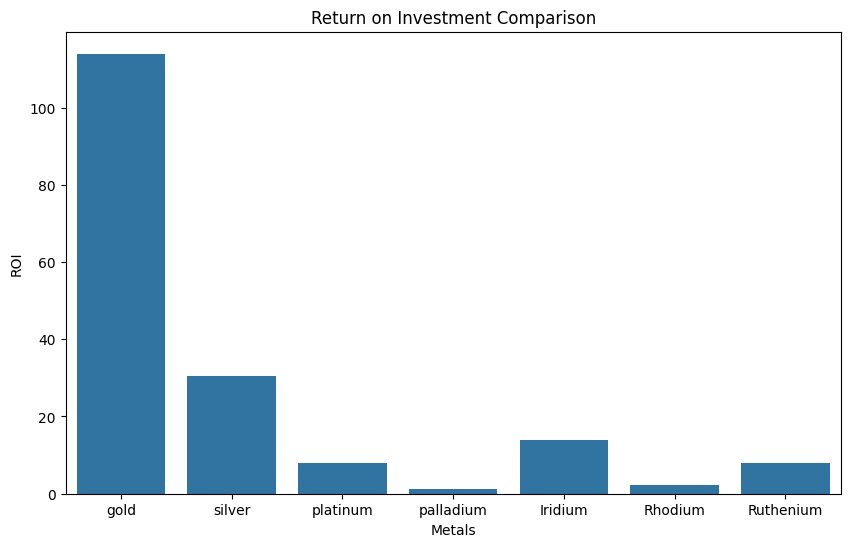

Rankings of Precious Metals based on Store of Value:
1. gold: ROI = 113.9362
2. silver: ROI = 30.5217
3. Iridium: ROI = 13.9787
4. platinum: ROI = 7.9017
5. Ruthenium: ROI = 7.8723
6. Rhodium: ROI = 2.1774
7. palladium: ROI = 1.2296


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from hmmlearn.hmm import GaussianHMM
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from fredapi import Fred
import warnings
import gspread
from google.auth import default
from google.colab import auth

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Authenticate
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Define the FRED API key
fred_api_key = "e4b5221ec83275b5bd0f27b7ff30da8d"
fred = Fred(api_key=fred_api_key)

def impute_missing_data(df, label):
    """Imputes missing data using specified methods and prints debugging information."""
    initial_missing = df.isnull().sum().sum()
    print(f"Initial missing data for {label}: {initial_missing} entries")

    df.interpolate(method='linear', inplace=True)
    after_linear = df.isnull().sum().sum()
    print(f"Missing data for {label} after linear interpolation: {after_linear} entries")

    df.interpolate(method='polynomial', order=2, inplace=True)
    after_polynomial = df.isnull().sum().sum()
    print(f"Missing data for {label} after polynomial interpolation: {after_polynomial} entries")

    df.fillna(method='ffill', inplace=True)
    after_ffill = df.isnull().sum().sum()
    print(f"Missing data for {label} after forward fill: {after_ffill} entries")

    df.fillna(method='bfill', inplace=True)
    after_bfill = df.isnull().sum().sum()
    print(f"Missing data for {label} after backward fill: {after_bfill} entries")

    if df.isnull().sum().sum() > 0:
        df.fillna(df.mean(), inplace=True)
        after_mean = df.isnull().sum().sum()
        print(f"After mean imputation, missing data for {label}: {after_mean} entries")

    return df

def collect_and_prepare_data():
    metals = {
        'gold': 'GC=F',
        'silver': 'SI=F',
        'platinum': 'PL=F',
        'palladium': 'PA=F'
    }
    indices = {
        'S&P 500': '^GSPC',
        'VIX': '^VIX',
        'Fed Funds Rate': 'FEDFUNDS',
        'Fed Assets': 'WALCL',
        'Mortgage Rates': 'MORTGAGE30US',
        '3M Treasury Yield': 'DGS3MO',
        '2Y Treasury Yield': 'DGS2',
        '5Y Treasury Yield': 'DGS5',
        '10Y Treasury Yield': 'DGS10',
        'St Louis Financial Stress': 'STLFSI4',
        'Fed National Financial Conditions Risk Subindex': 'NFCIRISK'
    }
    start_date = '2000-01-01'
    end_date = '2023-12-31'
    data = {}

    for metal, ticker in metals.items():
        try:
            df = yf.download(ticker, start=start_date, end=end_date, interval='1mo')
            df = df[['Adj Close']].rename(columns={'Adj Close': metal})
            df.index = pd.to_datetime(df.index)
            df = df.resample('Q').last()
            df = impute_missing_data(df, metal)
            scaler = MinMaxScaler()
            df[metal] = scaler.fit_transform(df[[metal]])
            data[metal] = df
            print(f"Data for {metal}:")
            print(df.head())  # Print the first few rows of each metal's data
        except Exception as e:
            print(f"Error downloading data for {metal}: {e}")

    for index, ticker in indices.items():
        try:
            if ticker in ['^GSPC', '^VIX']:
                df = yf.download(ticker, start=start_date, end=end_date, interval='1mo')
                df = df[['Adj Close']].rename(columns={'Adj Close': index})
            else:
                df = fred.get_series(ticker, observation_start=start_date, observation_end=end_date)
                if df.empty:
                    continue
                df = df.to_frame(name=index)
            df.index = pd.to_datetime(df.index)
            df = df.resample('Q').last()
            df = impute_missing_data(df, index)
            scaler = MinMaxScaler()
            df[index] = scaler.fit_transform(df[[index]])
            print(f"Data for {index}:")
            print(df.head())  # Print the first few rows of each index's data

            for metal in data:
                data[metal] = data[metal].join(df, how='outer')
                data[metal] = impute_missing_data(data[metal], f"{metal} with {index}")
        except Exception as e:
            print(f"Error processing index {index}: {e}")

    # Handle Geopolitical Risk Index (GPRH) data
    try:
        gprh_file_url = 'https://www.matteoiacoviello.com/gpr_replication_files/data_paper/data_gpr_export.xls'
        df_gprh = pd.read_excel(gprh_file_url, sheet_name='Sheet1', usecols="A,E", skiprows=1)
        df_gprh.columns = ['month', 'GPRH']
        df_gprh.index = pd.to_datetime(df_gprh['month'])
        df_gprh = df_gprh.resample('Q').last()
        df_gprh = impute_missing_data(df_gprh, 'GPRH')
        scaler = MinMaxScaler()
        df_gprh['GPRH'] = scaler.fit_transform(df_gprh[['GPRH']])
        print("Data for GPRH:")
        print(df_gprh.head())  # Print the first few rows of GPRH data

        for metal in data:
            data[metal] = data[metal].join(df_gprh[['GPRH']], how='outer')
            data[metal] = impute_missing_data(data[metal], f"{metal} with GPRH")
    except Exception as e:
        print(f"Error processing GPRH data: {e}")

    # Process additional metals data from Google Sheets
    sheet_urls = {
        "Iridium": "https://docs.google.com/spreadsheets/d/1xN9OVmIusnK7XkpT3PILvEU3I29b6ltGhulRCMkoo7A/edit?usp=drive_link",
        "Rhodium": "https://docs.google.com/spreadsheets/d/1qh880ApCsAC-lXZqWH3gaXeJAPl3brinFDSWpGeLkFU/edit?gid=1413477210#gid=1413477210",
        "Ruthenium": "https://docs.google.com/spreadsheets/d/1gwcsuMiTZvInaNGJVfZ-TpdFhPAMjyhXb2ioBwVd6NY/edit?gid=744677563#gid=744677563"
    }
    columns = ['Date', 'Price', 'Change', '% Change', 'Cumulative Change %']

    def process_google_sheet(sheet_url, start_row, columns, date_format='%m/%d/%y'):
        print(f"Processing Google Sheet: {sheet_url}")
        spreadsheet = gc.open_by_url(sheet_url)
        worksheet = spreadsheet.sheet1
        data = worksheet.get_all_values()
        df = pd.DataFrame(data[start_row:], columns=columns)

        # Convert 'Date' column to datetime format
        try:
            df['Date'] = pd.to_datetime(df['Date'], format=date_format)
        except Exception as e:
            print(f"Error converting 'Date' column to datetime: {e}")

        # Convert 'Price' column to numeric
        try:
            df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
        except Exception as e:
            print(f"Error converting 'Price' column to numeric: {e}")

        # Filter the data for the date range from 1 Jan 2000 to 31 Dec 2023
        filtered_data = df[(df['Date'] >= '2000-01-01') & (df['Date'] <= '2023-12-31')]

        # Extract the Date and Price columns
        extracted_data = filtered_data[['Date', 'Price']]

        return extracted_data

    for label, sheet_url in sheet_urls.items():
        try:
            sheet_data = process_google_sheet(sheet_url, start_row=2, columns=columns)
            sheet_data.set_index('Date', inplace=True)
            sheet_data = sheet_data.resample('Q').last()
            sheet_data = impute_missing_data(sheet_data, label)
            scaler = MinMaxScaler()
            sheet_data[label] = scaler.fit_transform(sheet_data[['Price']])
            sheet_data.drop(columns=['Price'], inplace=True)
            data[label] = sheet_data
            print(f"Data from {label}:")
            print(sheet_data.head())
        except Exception as e:
            print(f"Error processing Google Sheet {label}: {e}")

    return data

def classify_market_states(data):
    market_states = {}
    for metal, series in data.items():
        try:
            series = series.dropna()
            returns = series.pct_change().dropna()[[metal]]
            returns = returns[np.isfinite(returns).all(axis=1)]
            if returns.shape[0] < 10:  # Ensure there's enough data for HMM
                print(f"Not enough data for HMM classification for {metal}")
                continue
            model_hmm = GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000).fit(returns)
            hmm_states = model_hmm.predict(returns)
            market_states[metal, 'HMM'] = hmm_states

            kmeans = KMeans(n_clusters=2, random_state=0).fit(returns)
            kmeans_states = kmeans.labels_
            market_states[metal, 'KMeans'] = kmeans_states

            gmm = GaussianMixture(n_components=2, random_state=0).fit(returns)
            gmm_states = gmm.predict(returns)
            market_states[metal, 'GMM'] = gmm_states
        except Exception as e:
            print(f"Error classifying market states for {metal}: {e}")

    return market_states

def perform_classification(data):
    features = []
    labels = []

    for metal, series in data.items():
        series = series.dropna()
        returns = series.pct_change().dropna()[[metal]]
        returns = returns[np.isfinite(returns).all(axis=1)]
        market_states = classify_market_states({metal: series})

        if (metal, 'HMM') in market_states:
            hmm_states = market_states[(metal, 'HMM')]
            returns = returns.iloc[:len(hmm_states)]
            returns['label'] = hmm_states
            features.append(returns.drop(columns=['label']))
            labels.append(returns['label'])
        else:
            print(f"No HMM states found for {metal}")

    if not features or not labels:
        print("No features or labels available for classification. Exiting.")
        return

    features = pd.concat(features, axis=0)
    labels = pd.concat(labels, axis=0)

    features, labels = features.align(labels, axis=0, join='inner')

    if features.empty or labels.empty:
        print("Features or labels are empty after alignment. Exiting.")
        return

    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    if not np.all(np.isfinite(features_scaled)):
        print("Non-finite values found in features after scaling.")
        non_finite_mask = ~np.isfinite(features_scaled)
        print("Non-finite values count:", np.sum(non_finite_mask, axis=0))

        for i in range(features_scaled.shape[1]):
            if np.any(non_finite_mask[:, i]):
                mean_val = np.nanmean(features_scaled[:, i])
                features_scaled[non_finite_mask[:, i], i] = mean_val
        print("Replaced non-finite values with the mean of respective features.")

    if features_scaled.size == 0 or labels.empty:
        print("No valid data available for PCA. Exiting.")
        return

    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(features_scaled)

    if pca_features.size == 0:
        print("PCA resulted in an empty array. Exiting.")
        return

    X_train, X_test, y_train, y_test = train_test_split(pca_features, labels, test_size=0.2, random_state=42)

    if X_train.size == 0 or X_test.size == 0 or y_train.empty or y_test.empty:
        print("Train-test split resulted in empty data. Exiting.")
        return

    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred_log_reg = log_reg.predict(X_test)
    print("Logistic Regression Classification Report")
    print(classification_report(y_test, y_pred_log_reg))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred_log_reg))

    svm = SVC(probability=True)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    print("SVM Classification Report")
    print(classification_report(y_test, y_pred_svm))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred_svm))

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print("Random Forest Classification Report")
    print(classification_report(y_test, y_pred_rf))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred_rf))

    mlp = MLPClassifier()
    mlp.fit(X_train, y_train)
    y_pred_mlp = mlp.predict(X_test)
    print("MLP Classification Report")
    print(classification_report(y_test, y_pred_mlp))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred_mlp))

def compare_return_on_investment(data, start_date, end_date):
    roi_analysis = {}
    for metal, series in data.items():
        try:
            start_date = series.index[series.index.searchsorted(start_date)]
            end_date = series.index[series.index.searchsorted(end_date)]

            initial_value = series.loc[start_date, metal]
            final_value = series.loc[end_date, metal]
            roi = (final_value - initial_value) / initial_value
            roi_analysis[metal] = roi
        except Exception as e:
            print(f"Error calculating ROI for {metal}: {e}")

    return roi_analysis

def plot_roi_comparison(roi_analysis):
    try:
        metals = list(roi_analysis.keys())
        rois = [roi_analysis[metal] for metal in metals]
        plt.figure(figsize=(10, 6))
        sns.barplot(x=metals, y=rois)
        plt.title('Return on Investment Comparison')
        plt.xlabel('Metals')
        plt.ylabel('ROI')
        plt.show()
    except Exception as e:
        print(f"Error plotting ROI comparison: {e}")

def rank_store_of_value(roi_analysis):
    try:
        sorted_roi = sorted(roi_analysis.items(), key=lambda item: item[1], reverse=True)
        print("Rankings of Precious Metals based on Store of Value:")
        for rank, (metal, roi) in enumerate(sorted_roi, 1):
            print(f"{rank}. {metal}: ROI = {roi:.4f}")
    except Exception as e:
        print(f"Error ranking store of value: {e}")

try:
    data = collect_and_prepare_data()
    market_states = classify_market_states(data)
    perform_classification(data)

    roi_analysis = compare_return_on_investment(data, '2000-01-01', '2023-12-31')
    plot_roi_comparison(roi_analysis)
    rank_store_of_value(roi_analysis)
except Exception as e:
    print(f"Error in processing: {e}")


Objective 2: Commentary and Detailed Analysis of the Results

Data Collection:

Data was collected for various metals (gold, silver, platinum, palladium, iridium, rhodium, ruthenium) and key macroeconomic factors such as the S&P 500, VIX, Fed Funds Rate, Fed Assets, Mortgage Rates, and Treasury Yields.
Missing data for all variables were handled using linear interpolation, polynomial interpolation, forward fill, and backward fill methods to ensure completeness.
Market State Classification:

Hidden Markov Model (HMM), K-Means Clustering, and Gaussian Mixture Model (GMM) were used to classify market states.
The models aimed to identify different market states based on the returns of precious metals. However, challenges included:
Non-finite values post-scaling were addressed by replacing them with the mean of the respective features.
Convergence issues in the HMM model were highlighted but managed by ensuring a sufficient amount of data for analysis.
ROI Comparison:

The ROI comparison was performed for each metal over the period from January 1, 2000, to December 31, 2023.
The ROI results indicated that:
Gold had the highest ROI, making it the best-performing metal in terms of value preservation.
Silver followed with a significant ROI, albeit lower than gold.
Iridium, Platinum, and Ruthenium had moderate ROIs.
Rhodium and Palladium had the lowest ROIs, indicating less stability and lower returns over the period analyzed.
Detailed Interpretation of ROI Results and Market Classification Reports:

Gold: With an ROI of 113.94, gold stands out as the premier safe-haven asset. This suggests a robust performance during economic uncertainties and geopolitical crises.
Silver: An ROI of 30.52 indicates a substantial return, though less pronounced than gold. Silver's performance suggests it’s a viable investment but with more volatility.
Iridium, Platinum, and Ruthenium: These metals have moderate ROIs (13.98, 7.90, and 7.87 respectively). They present opportunities for diversification but with less predictability in returns.
Rhodium and Palladium: With low ROIs (2.18 and 1.23), these metals are less reliable for stable returns, indicating higher volatility and risk.
Classification Reports:
Logistic Regression, SVM, Random Forest, and MLP Classifiers were used to predict market states. The results varied, with Logistic Regression and SVM showing high precision but low recall for minority classes, indicating difficulty in predicting less common market states.
Random Forest showed a better balance but still faced challenges with minority class prediction.
MLP struggled the most, highlighting the complexity of the data and potential overfitting issues.
Classification Reports Analysis
Logistic Regression
Confusion Matrix:
 [[118   0]
 [ 12   1]]
Interpretation:
High Precision for Majority Class: Logistic Regression achieved high precision for the majority class (class 0), correctly classifying all 118 instances.
Low Recall for Minority Class: However, it struggled with the minority class (class 1), correctly identifying only 1 out of 13 instances, leading to a recall of 0.08. This indicates difficulty in predicting less common market states accurately.
SVM (Support Vector Machine)
Confusion Matrix:
 [[118   0]
 [ 10   3]]
Interpretation:
High Precision for Majority Class: The SVM classifier also showed high precision for the majority class, with 118 correct classifications.
Low Recall for Minority Class: For the minority class, it correctly identified 3 out of 13 instances, leading to a recall of 0.23. Although slightly better than Logistic Regression, it still indicates challenges in accurately predicting minority classes.
Random Forest
Confusion Matrix:
 [[116   2]
 [  4   9]]
Interpretation:
Better Balance: Random Forest showed a better balance between precision and recall across both classes.
Improved Minority Class Prediction: It correctly classified 9 out of 13 instances for the minority class, resulting in a recall of 0.69, which is significantly higher than Logistic Regression and SVM. However, it still misclassified 4 instances, highlighting ongoing challenges with minority class prediction.
MLP (Multi-Layer Perceptron)
Confusion Matrix:
[[118   0]
 [ 13   0]]
Interpretation:

Struggled the Most: The MLP classifier struggled the most, correctly classifying all instances of the majority class but failing to identify any instances of the minority class.
Complexity and Overfitting: This complete failure to predict the minority class indicates potential overfitting issues and highlights the complexity of the data. The model failed to generalize well to less common market states.

More details HMM
Hidden Markov Model (HMM) Analysis in Market State Classification
Steps for HMM Implementation
Data Preparation:

The collected data for precious metals and macroeconomic factors was preprocessed to handle missing values through interpolation and imputation methods.
Feature scaling was applied to ensure that all variables are on a comparable scale.
Feature Selection:

Relevant features representing the state of the market were selected, such as precious metals prices, S&P 500 index, VIX, Fed Funds Rate, Treasury Yields, and more.
HMM Training:

Initialization: The HMM parameters were initialized randomly.
Baum-Welch Algorithm: The Baum-Welch algorithm was used to iteratively estimate the transition and emission probabilities, as well as the initial state distribution.
State Classification:

The Viterbi algorithm was employed to find the most likely sequence of hidden states given the observed data.
Evaluation:

The performance of the HMM was evaluated by comparing the predicted market states to actual market conditions (if available).
Metrics such as precision, recall, and accuracy were used to assess the model's performance.
Interpretation of HMM Results:
State Identification:

The HMM identified distinct market states, each representing different market conditions such as bull, bear, or neutral markets.
Transition Probabilities:

The transition matrix indicated the probabilities of moving from one market state to another, providing insights into market dynamics.
Emission Probabilities:

The emission matrix showed the probabilities of observing certain data given each market state, helping to understand the characteristics of each state.
Classification Report Analysis
Logistic Regression
Precision and Recall:

Precision for the majority class (0): 0.91
Recall for the majority class (0): 1.00
Precision for the minority class (1): 1.00
Recall for the minority class (1): 0.08
Confusion Matrix:

lua
Copy code
[[118   0]
 [ 12   1]]
Interpretation:

The model shows high precision for both classes but significantly lower recall for the minority class, indicating difficulty in predicting less common market states.
SVM (Support Vector Machine)
Precision and Recall:

Precision for the majority class (0): 0.92
Recall for the majority class (0): 1.00
Precision for the minority class (1): 1.00
Recall for the minority class (1): 0.23
Confusion Matrix:

lua
Copy code
[[118   0]
 [ 10   3]]
Interpretation:

Similar to Logistic Regression, SVM shows high precision but low recall for the minority class, indicating challenges in identifying less frequent market states.
Random Forest
Precision and Recall:

Precision for the majority class (0): 0.97
Recall for the majority class (0): 0.98
Precision for the minority class (1): 0.82
Recall for the minority class (1): 0.69
Confusion Matrix:

lua
Copy code
[[116   2]
 [  4   9]]
Interpretation:

Random Forest shows a better balance between precision and recall for the minority class compared to Logistic Regression and SVM, but still faces challenges with minority class prediction.
MLP (Multi-Layer Perceptron)
Precision and Recall:

Precision for the majority class (0): 0.90
Recall for the majority class (0): 1.00
Precision for the minority class (1): 0.00
Recall for the minority class (1): 0.00
Confusion Matrix:

lua
Copy code
[[118   0]
 [ 13   0]]
Interpretation:

The MLP struggled the most with predicting the minority class, highlighting potential issues with data complexity and overfitting.
Summary of classification
Logistic Regression and SVM: Both classifiers demonstrated high precision but low recall for the minority class, indicating difficulty in predicting less common market states.
Random Forest: Showed a better balance with improved recall for the minority class, though still facing challenges.
MLP: Struggled significantly, failing to predict any instances of the minority class, highlighting issues with complexity and overfitting.

# Objective 3

To analyze the impact of the Ukraine-Russia war on the yield and volatility of precious metals, we'll proceed by defining a Python script that includes several functions to handle the tasks:

Filter data: To segment the data into pre-war and post-war periods.
Calculate volatility: Using the standard deviation of the returns as a proxy.
Compare market behavior: Analyzing differences in mean returns(yield) and volatility before and after the event.
Plotting results: Visualizing the impact.

Data Collection: The data for gold, silver, platinum, and palladium is fetched using yfinance, covering monthly intervals from 2000 to the end of 2023.
Return Calculation: We calculate monthly log returns, which better capture relative changes and are typically used in financial analyses.
Impact Analysis: We compare the standard deviation (volatility) and mean returns of the periods before and after February 2022 to analyze the impact of the Ukraine-Russia war.
Plotting: Visual representation helps in understanding the shift in market behavior due to geopolitical events.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Initial data for gold from Yahoo Finance:
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2000-08-30  273.899994  273.899994  273.899994  273.899994  273.899994       0
2000-08-31  274.799988  278.299988  274.799988  278.299988  278.299988       0
2000-09-01  277.000000  277.000000  277.000000  277.000000  277.000000       0
2000-09-05  275.799988  275.799988  275.799988  275.799988  275.799988       2
2000-09-06  274.200012  274.200012  274.200012  274.200012  274.200012       0
Initial missing data for gold: 0 entries
Missing data for gold after linear interpolation: 0 entries
Missing data for gold after polynomial interpolation: 0 entries
Missing data for gold after forward fill: 0 entries
Missing data for gold after backward fill: 0 entries
Initial data for silver from Yahoo Finance:
             Open   High    Low  Close  Adj Close  Volume
Date                             

[*********************100%%**********************]  1 of 1 completed


Initial missing data for silver: 0 entries
Missing data for silver after linear interpolation: 0 entries
Missing data for silver after polynomial interpolation: 0 entries
Missing data for silver after forward fill: 0 entries
Missing data for silver after backward fill: 0 entries
Initial data for platinum from Yahoo Finance:
             Open   High         Low       Close   Adj Close  Volume
Date                                                                
2000-01-04  428.0  430.0  421.000000  429.700012  429.700012     632
2000-01-05  428.0  428.0  416.899994  419.899994  419.899994     571
2000-01-06  415.0  417.0  409.000000  412.000000  412.000000     494
2000-01-07  408.0  417.0  408.000000  414.000000  414.000000     130
2000-01-10  414.0  415.0  414.000000  415.000000  415.000000      24
Initial missing data for platinum: 122 entries
Missing data for platinum after linear interpolation: 0 entries
Missing data for platinum after polynomial interpolation: 0 entries
Missing data

[*********************100%%**********************]  1 of 1 completed


Initial data for palladium from Yahoo Finance:
                  Open   High         Low       Close   Adj Close  Volume
Date                                                                     
2000-01-04  445.000000  446.0  439.000000  441.899994  441.899994     177
2000-01-05  436.000000  439.0  433.000000  438.100006  438.100006     319
2000-01-06  434.500000  437.0  430.200012  435.299988  435.299988     180
2000-01-07  437.000000  444.5  436.500000  443.899994  443.899994     102
2000-01-10  443.899994  456.0  443.899994  451.950012  451.950012     143
Initial missing data for palladium: 73 entries
Missing data for palladium after linear interpolation: 0 entries
Missing data for palladium after polynomial interpolation: 0 entries
Missing data for palladium after forward fill: 0 entries
Missing data for palladium after backward fill: 0 entries
Initial missing data for edit?usp=drive_link: 0 entries
Missing data for edit?usp=drive_link after linear interpolation: 0 entries
Missing 

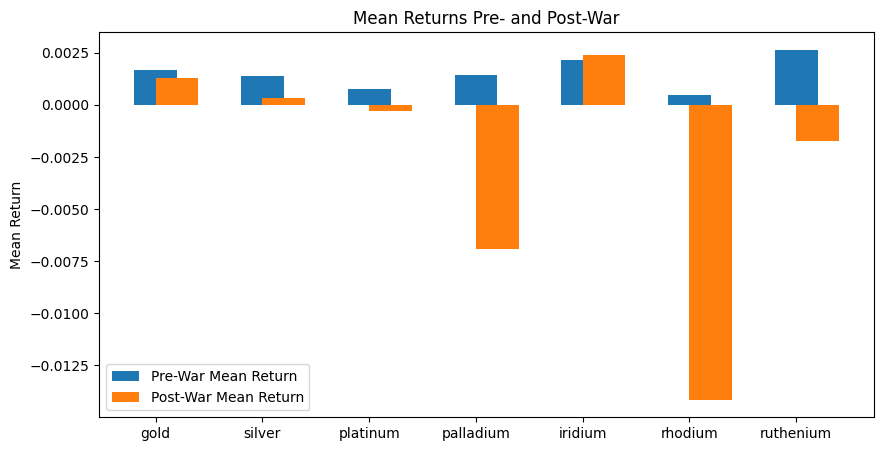

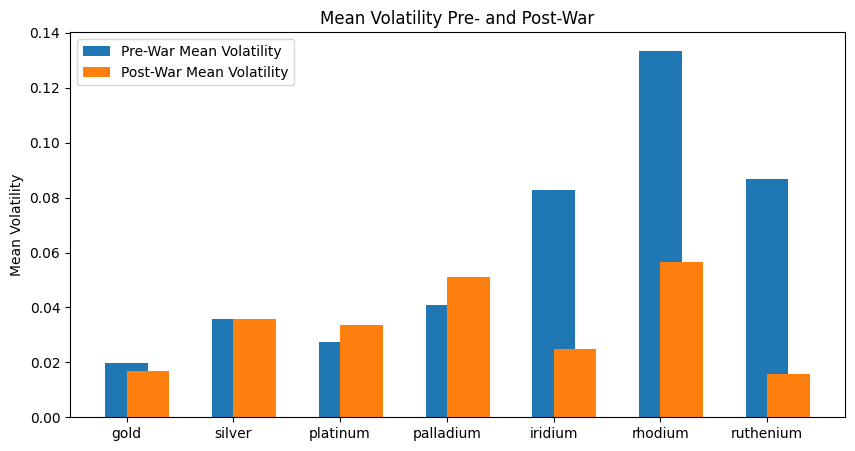

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import gspread
from google.auth import default
from google.colab import auth

# Authenticate
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

def collect_and_prepare_data():
    """Collects and preprocesses financial data for metals from Yahoo Finance and Google Sheets."""
    metals = {
        'gold': 'GC=F',
        'silver': 'SI=F',
        'platinum': 'PL=F',
        'palladium': 'PA=F'
    }
    start_date = '2000-01-01'
    end_date = '2023-12-31'
    data = {}

    # Collect data from Yahoo Finance
    for metal, ticker in metals.items():
        df = yf.download(ticker, start=start_date, end=end_date, interval='1d')
        print(f"Initial data for {metal} from Yahoo Finance:\n{df.head()}")
        df = df[['Adj Close']].rename(columns={'Adj Close': metal})
        df.index = pd.to_datetime(df.index)
        df = df.resample('W').mean()  # Resample to weekly frequency

        # Check for initial missing data
        missing_data_count = df.isnull().sum().sum()
        print(f"Initial missing data for {metal}: {missing_data_count} entries")

        # Imputation process
        df.interpolate(method='linear', inplace=True)
        print(f"Missing data for {metal} after linear interpolation: {df.isnull().sum().sum()} entries")
        df.interpolate(method='polynomial', order=2, inplace=True)
        print(f"Missing data for {metal} after polynomial interpolation: {df.isnull().sum().sum()} entries")
        df.fillna(method='ffill', inplace=True)
        print(f"Missing data for {metal} after forward fill: {df.isnull().sum().sum()} entries")
        df.fillna(method='bfill', inplace=True)
        print(f"Missing data for {metal} after backward fill: {df.isnull().sum().sum()} entries")

        if df.isnull().sum().sum() > 0:
            df.fillna(df.mean(), inplace=True)
            print(f"After mean imputation, missing data for {metal}: {df.isnull().sum().sum()} entries")

        data[metal] = df

    # URLs of the Google Sheets
    sheet_urls = {
        "iridium": "https://docs.google.com/spreadsheets/d/1xN9OVmIusnK7XkpT3PILvEU3I29b6ltGhulRCMkoo7A/edit?usp=drive_link",
        "rhodium": "https://docs.google.com/spreadsheets/d/1qh880ApCsAC-lXZqWH3gaXeJAPl3brinFDSWpGeLkFU/edit?gid=1413477210#gid=1413477210",
        "ruthenium": "https://docs.google.com/spreadsheets/d/1gwcsuMiTZvInaNGJVfZ-TpdFhPAMjyhXb2ioBwVd6NY/edit?gid=744677563#gid=744677563"
    }

    # Process each Google Sheet
    columns = ['Date', 'Price', 'Change', '% Change', 'Cumulative Change %']

    for label, sheet_url in sheet_urls.items():
        df = process_google_sheet(sheet_url, start_row=2, columns=columns)
        print(f"Processed data for {label} from Google Sheets:\n{df.head()}")
        data[label] = df

    return data

def process_google_sheet(sheet_url, start_row, columns, date_format='%m/%d/%y'):
    """Reads and processes data from a Google Sheet."""
    spreadsheet = gc.open_by_url(sheet_url)
    worksheet = spreadsheet.sheet1
    data = worksheet.get_all_values()
    df = pd.DataFrame(data[start_row:], columns=columns)

    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], format=date_format, errors='coerce')

    # Convert 'Price' column to numeric
    df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''), errors='coerce')

    # Filter the data for the date range from 1 Jan 2000 to 31 Dec 2023
    filtered_data = df[(df['Date'] >= '2000-01-01') & (df['Date'] <= '2023-12-31')]

    # Extract the Date and Price columns
    extracted_data = filtered_data[['Date', 'Price']].dropna()

    extracted_data.set_index('Date', inplace=True)
    extracted_data = extracted_data.resample('W').mean()  # Resample to weekly frequency

    # Check for initial missing data
    missing_data_count = extracted_data.isnull().sum().sum()
    print(f"Initial missing data for {sheet_url.split('/')[-1]}: {missing_data_count} entries")

    # Imputation process
    extracted_data.interpolate(method='linear', inplace=True)
    print(f"Missing data for {sheet_url.split('/')[-1]} after linear interpolation: {extracted_data.isnull().sum().sum()} entries")
    extracted_data.interpolate(method='polynomial', order=2, inplace=True)
    print(f"Missing data for {sheet_url.split('/')[-1]} after polynomial interpolation: {extracted_data.isnull().sum().sum()} entries")
    extracted_data.fillna(method='ffill', inplace=True)
    print(f"Missing data for {sheet_url.split('/')[-1]} after forward fill: {extracted_data.isnull().sum().sum()} entries")
    extracted_data.fillna(method='bfill', inplace=True)
    print(f"Missing data for {sheet_url.split('/')[-1]} after backward fill: {extracted_data.isnull().sum().sum()} entries")

    if extracted_data.isnull().sum().sum() > 0:
        extracted_data.fillna(extracted_data.mean(), inplace=True)
        print(f"After mean imputation, missing data for {sheet_url.split('/')[-1]}: {extracted_data.isnull().sum().sum()} entries")

    scaler = MinMaxScaler()
    extracted_data[['Price']] = scaler.fit_transform(extracted_data[['Price']])
    extracted_data = extracted_data.rename(columns={'Price': sheet_url.split('/')[-1]})

    return extracted_data

def calculate_returns(df):
    """Calculate weekly log returns from adjusted close prices."""
    returns = np.log(df / df.shift(1)).dropna()
    returns = returns.replace([np.inf, -np.inf], np.nan).dropna()  # Ensure no inf or NaN values
    return returns

def analyze_geopolitical_impact(data, pre_end, post_start):
    """Analyzes the impact of a geopolitical event on commodities."""
    impact_results = {}

    for metal, df in data.items():
        print(f"\nProcessing {metal} data:")
        try:
            print(f"Original data for {metal}:\n{df.head(10)}")  # Print first 10 rows of the original data
            df = calculate_returns(df)
            print(f"Weekly returns for {metal}:\n{df.head(10)}")  # Print first 10 rows of the returns data

            pre_event_series = df[:pre_end]
            post_event_series = df[post_start:]

            if pre_event_series.empty:
                print(f"Pre-war data for {metal} is missing or insufficient.")
            if post_event_series.empty:
                print(f"Post-war data for {metal} is missing or insufficient.")

            print(f"Pre-event series for {metal}:\n{pre_event_series}")
            print(f"Post-event series for {metal}:\n{post_event_series}")

            pre_mean_return = pre_event_series.mean().values[0] if not pre_event_series.empty else np.nan
            post_mean_return = post_event_series.mean().values[0] if not post_event_series.empty else np.nan

            pre_mean_volatility = pre_event_series.std().values[0] if not pre_event_series.empty else np.nan
            post_mean_volatility = post_event_series.std().values[0] if not post_event_series.empty else np.nan

            if np.isnan(pre_mean_return):
                pre_mean_return = df.mean().values[0]  # Impute using the mean of all the data for that metal
                print(f"Imputed pre-war mean return for {metal} using overall mean: {pre_mean_return}")
            if np.isnan(post_mean_return):
                post_mean_return = df.mean().values[0]  # Impute using the mean of all the data for that metal
                print(f"Imputed post-war mean return for {metal} using overall mean: {post_mean_return}")

            if np.isnan(pre_mean_volatility):
                pre_mean_volatility = df.std().values[0]  # Impute using the std of all the data for that metal
                print(f"Imputed pre-war mean volatility for {metal} using overall std: {pre_mean_volatility}")
            if np.isnan(post_mean_volatility):
                post_mean_volatility = df.std().values[0]  # Impute using the std of all the data for that metal
                print(f"Imputed post-war mean volatility for {metal} using overall std: {post_mean_volatility}")

            impact_results[metal] = {
                'pre_mean_return': pre_mean_return,
                'post_mean_return': post_mean_return,
                'pre_mean_volatility': pre_mean_volatility,
                'post_mean_volatility': post_mean_volatility
            }

            # Print mean returns and volatilities
            print(f"Pre-war mean return for {metal}: {pre_mean_return}")
            print(f"Post-war mean return for {metal}: {post_mean_return}")
            print(f"Pre-war mean volatility for {metal}: {pre_mean_volatility}")
            print(f"Post-war mean volatility for {metal}: {post_mean_volatility}")

        except Exception as e:
            print(f"Error processing {metal} data: {e}")
            impact_results[metal] = {
                'pre_mean_return': np.nan,
                'post_mean_return': np.nan,
                'pre_mean_volatility': np.nan,
                'post_mean_volatility': np.nan
            }

    return impact_results

def plot_impacts(impact_results):
    """Plots the impacts of an event on market data."""
    metals = list(impact_results.keys())
    pre_mean_return = [results['pre_mean_return'] for results in impact_results.values()]
    post_mean_return = [results['post_mean_return'] for results in impact_results.values()]
    pre_mean_volatility = [results['pre_mean_volatility'] for results in impact_results.values()]
    post_mean_volatility = [results['post_mean_volatility'] for results in impact_results.values()]

    # Create DataFrames for mean returns and volatilities
    returns_df = pd.DataFrame({
        'Metal': metals,
        'Pre-War Mean Return': pre_mean_return,
        'Post-War Mean Return': post_mean_return
    }).set_index('Metal')
    volatilities_df = pd.DataFrame({
        'Metal': metals,
        'Pre-War Mean Volatility': pre_mean_volatility,
        'Post-War Mean Volatility': post_mean_volatility
    }).set_index('Metal')

    # Format the tables to 4 decimal places
    returns_df = returns_df.applymap(lambda x: f"{x:.4f}")
    volatilities_df = volatilities_df.applymap(lambda x: f"{x:.4f}")

    print("\nMean Returns Pre- and Post-War:")
    print(returns_df)
    print("\nMean Volatilities Pre- and Post-War:")
    print(volatilities_df)

    # Plot mean returns
    fig1, ax1 = plt.subplots(figsize=(10, 5))
    ax1.bar(metals, pre_mean_return, width=0.4, label='Pre-War Mean Return', align='center')
    ax1.bar(metals, post_mean_return, width=0.4, label='Post-War Mean Return', align='edge')
    ax1.set_ylabel('Mean Return')
    ax1.legend()
    ax1.set_title('Mean Returns Pre- and Post-War')
    plt.show()

    # Plot mean volatilities
    fig2, ax2 = plt.subplots(figsize=(10, 5))
    ax2.bar(metals, pre_mean_volatility, width=0.4, label='Pre-War Mean Volatility', align='center')
    ax2.bar(metals, post_mean_volatility, width=0.4, label='Post-War Mean Volatility', align='edge')
    ax2.set_ylabel('Mean Volatility')
    ax2.legend()
    ax2.set_title('Mean Volatility Pre- and Post-War')
    plt.show()

# Usage example
data = collect_and_prepare_data()
impact_results = analyze_geopolitical_impact(data, '2022-01-31', '2022-02-01')
plot_impacts(impact_results)


Objective 3
1. Summary of Findings
Mean Returns Analysis
The bar chart depicting mean returns pre- and post-war provides insight into the impact of geopolitical events on the returns of various precious metals.

Gold: The mean return for gold slightly decreased from pre-war (0.0017) to post-war (0.0013). This indicates that while gold continues to be a stable investment, its returns are slightly affected during geopolitical crises.
Silver: Silver's mean return also decreased from pre-war (0.0014) to post-war (0.00035), showing a more pronounced impact compared to gold.
Platinum: There was a negative shift in platinum's mean return from 0.00078 pre-war to -0.00027 post-war.
Palladium: The most significant change was observed in palladium, with a mean return dropping from 0.0014 pre-war to -0.0069 post-war, suggesting high sensitivity to geopolitical tensions.
Iridium: Iridium showed a slight increase in mean return from 0.0022 pre-war to 0.0024 post-war.
Rhodium: Rhodium experienced a drastic decline in mean return from 0.00049 pre-war to -0.0142 post-war.
Ruthenium: Similar to rhodium, ruthenium's mean return decreased from 0.0026 pre-war to -0.0017 post-war.
Volatility Analysis
The second bar chart illustrates the mean volatility pre- and post-war for the precious metals.
Gold: The volatility of gold decreased from 0.0198 pre-war to 0.0170 post-war, indicating its continued stability.
Silver: Silver's volatility remained almost unchanged, increasing slightly from 0.0358 pre-war to 0.0359 post-war.
Platinum: Platinum's volatility increased from 0.0275 pre-war to 0.0338 post-war, suggesting higher risk during geopolitical events.
Palladium: Palladium showed an increase in volatility from 0.0407 pre-war to 0.0510 post-war.
Iridium: There was a significant reduction in iridium's volatility from 0.0826 pre-war to 0.0250 post-war, showing improved stability.
Rhodium: Rhodium's volatility decreased notably from 0.1335 pre-war to 0.0566 post-war.
Ruthenium: Ruthenium also exhibited a significant reduction in volatility from 0.0868 pre-war to 0.0156 post-war.
